<hr style="height:5px;border-width:0;color:orange;background-color:orange">
<h1 style="blackground:#FCB700; border:0; border-radius: 10px; color:white; font-size: 32px;"> <center> <b>NUCLIO DIGITAL SCHOOL -</b> MASTER EN DATA SCIENCE </center> </h1>
<h1 style="display: flex; align-items: right;">
    <div align="center"><img src="https://nuclio.school/wp-content/uploads/2018/12/nucleoDS-newBlack.png" alt="Nuclio logo" style="height: 100px; margin-right: 10px; align=right"></div>
</h1>
<h1 style='background:#FCB700; border:0; border-radius: 10px; color:white'>
    <center>Capstone Project  -  Retail</center>
</h1>
<span style="font-size: 16px;">

+ A√±o: **2024**
+ Autores: **Juan Jos√© Guerrero, Adrian Ortega, Ariana Puentes,  Cristina S√°nchez**
+ Tutor: **Daniel Pegalajar Luque**

</span>
<hr style="height:5px;border-width:0;color:orange;background-color:orange">


# <h2 style='background:#b1b1b1; border:0; border-radius: 10px; color:black'><center>CONFIGURACI√ìN NOTEBOOK</center></h2>

## Importaci√≥n librerias

In [1]:
#Librerias generales
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from math import sqrt
import warnings
import holidays
from pylab import rcParams
import pickle

#librerias procesamiento
from sklearn.model_selection import TimeSeriesSplit
from sktime.forecasting.model_selection import temporal_train_test_split
from sklearn.model_selection import train_test_split
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer, MissingIndicator
from sklearn.preprocessing import RobustScaler

#librerias modelos
from sktime.forecasting.naive import NaiveForecaster
from sktime.utils.plotting import plot_series
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.compose import make_reduction,TransformedTargetForecaster
from sktime.forecasting.trend import PolynomialTrendForecaster
from sktime.forecasting.model_selection import ForecastingRandomizedSearchCV, ExpandingWindowSplitter , SlidingWindowSplitter
from sktime.transformations.series.boxcox import LogTransformer
from sktime.transformations.series.detrend import Deseasonalizer, Detrender
from sktime.transformations.series.func_transform import FunctionTransformer
from sklearn.pipeline import Pipeline, FeatureUnion

#Librerias time series
import pymannkendall as mk
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
from statsmodels.tsa.stattools import adfuller, kpss
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm

##ML
###Bagging
from sklearn.ensemble import ExtraTreesRegressor, RandomForestRegressor
from sklearn.tree import plot_tree
###Boosting
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from xgboost import plot_importance, plot_tree
from catboost import CatBoostRegressor
##propher
from prophet import Prophet
from prophet.plot import plot, plot_components, plot_cross_validation_metric
from prophet.diagnostics import cross_validation, performance_metrics
##ARIMA
from statsmodels.tsa.arima.model import ARIMA, ARIMAResults
from statsmodels.tsa.statespace.sarimax import SARIMAX
from pmdarima import auto_arima

#librerias optimizacion y validacion cruzada
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, randint
from sklearn.model_selection import KFold

#librerias metricas y validacion del modelo
from sklearn.calibration import calibration_curve, CalibrationDisplay
from sklearn.inspection import permutation_importance
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error , mean_absolute_percentage_error, root_mean_squared_error
from sktime.performance_metrics.forecasting import mean_absolute_percentage_error
import shap

#Librerias visualizaci√≥n
import seaborn as sns
import plotly.express as px
import plotly.io as pio
import plotly.graph_objects as go
from matplotlib import pyplot as plt

## Configuraciones

In [6]:
pd.set_option("display.max_columns", 500)
pd.options.display.float_format = '{:,.4f}'.format

#configuraci√≥n google drive
# drive.mount('/content/drive', force_remount=True) #descomentar si se trabaja en google

<h1 style='background:#b1b1b1; border:0; border-radius: 10px; color:black'>
    <center>T3. MODELOS DE PREDICCI√ìN</center>
</h1>

# <h2 style='background:#4e4e4e; border:0; border-radius: 10px; color:black'><center>OBJETIVOS</center></h2>

En este estudio se ha desarrollado un an√°lisis de series temporales con el objetivo de predecir las ventas. Se han empleado diversas metodolog√≠as y modelos de aprendizaje autom√°tico para optimizar la predicci√≥n de las ventas y entender los patrones temporales presentes en los datos.
La predicci√≥n de tendencias es una de las aplicaciones m√°s avanzadas del an√°lisis de datos en supermercados. Mediante el uso de modelos estad√≠sticos y t√©cnicas de Machine Learning, se pueden anticipar cambios en el comportamiento del consumidor, lo que permite adaptar la oferta de productos y las estrategias comerciales con mayor precisi√≥n. Identificar tendencias emergentes en el consumo, como el aumento de la demanda de productos org√°nicos o sin gluten, brinda una ventaja competitiva al supermercado al permitirle adelantarse a las necesidades del mercado. Adem√°s, la capacidad de prever cambios en la demanda ayuda a optimizar el stock y a desarrollar estrategias de marketing m√°s efectivas. Con estos an√°lisis, se pueden detectar oportunidades para lanzar nuevos productos o adaptar las campa√±as promocionales de manera m√°s efectiva.

# <h2 style='background:#4e4e4e; border:0; border-radius: 10px; color:black'><center>0. AN√ÅLISIS TEMPORAL DE DATOS</center></h2>


## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.1. CARGA DE DATOS</center></h3>

In [2]:
df = pd.read_pickle ('df_total.pkl')
df_ts = df.groupby("date")["daily_sales"].sum().reset_index()


## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.2. DISTRIBUCION DE LA SERIE</center></h3>

In [8]:
# Agregar columnas de mes y d√≠a de la semana
df_ts["Month"] = df_ts["date"].dt.month
df_ts["Weekday"] = df_ts["date"].dt.weekday

# Funci√≥n adaptada para analizar la distribuci√≥n de los datos
def data_distribution_graph(df):
    # Histograma de ventas diarias
    fig = px.histogram(df, x='daily_sales', title="Distribuci√≥n de Ventas Diarias")
    fig.show()

    # Distribuci√≥n por meses
    fig1 = px.box(df, x='Month', y='daily_sales', title="Distribuci√≥n de Ventas por Mes")
    fig1.update_xaxes(
        tickvals=list(range(1, 13)),
        ticktext=["Enero", "Febrero", "Marzo", "Abril", "Mayo", "Junio",
                "Julio", "Agosto", "Septiembre", "Octubre", "Noviembre", "Diciembre"]
    )
    fig1.show()

    # Distribuci√≥n por d√≠a de la semana
    fig2 = px.box(df, x='Weekday', y='daily_sales', title="Distribuci√≥n de Ventas por D√≠a de la Semana")
    fig2.update_xaxes(
        tickvals=list(range(7)),
        ticktext=["Lunes", "Martes", "Mi√©rcoles", "Jueves", "Viernes", "S√°bado", "Domingo"]
    )
    fig2.show()

# Llamar a la funci√≥n para generar los gr√°ficos
data_distribution_graph(df_ts)

<b>Histograma de Ventas Diarias:</b>

La distribuci√≥n de las ventas tiene una ligera asimetr√≠a a la derecha, lo que indica que hay d√≠as con ventas mucho m√°s altas que la media.
Se observa un pico alrededor de valores medios de ventas, lo que sugiere que la mayor√≠a de los d√≠as tienen ventas en un rango estable, con algunas excepciones de d√≠as con ventas muy altas.

<b>Boxplot de Ventas por Mes:</b>

Se observan diferencias en la distribuci√≥n de ventas a lo largo de los meses.
Algunos meses tienen una variabilidad mayor en las ventas (presencia de valores at√≠picos), lo que podr√≠a indicar estacionalidad en las ventas.
Es posible que haya meses con ventas significativamente m√°s altas debido a eventos o promociones.

<b>Boxplot de Ventas por D√≠a de la Semana:</b>

La mediana de ventas es diferente seg√∫n el d√≠a de la semana.
Se observa una mayor dispersi√≥n en algunos d√≠as, lo que podr√≠a indicar que ciertos d√≠as tienen m√°s fluctuaciones en la demanda.
Podr√≠a haber patrones donde ciertos d√≠as de la semana (por ejemplo, fines de semana) tienen mayores ventas en comparaci√≥n con d√≠as laborales.

## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.3. AUTOCORRELACION Y AUTOCORRELACION PARCIAL</center></h3>

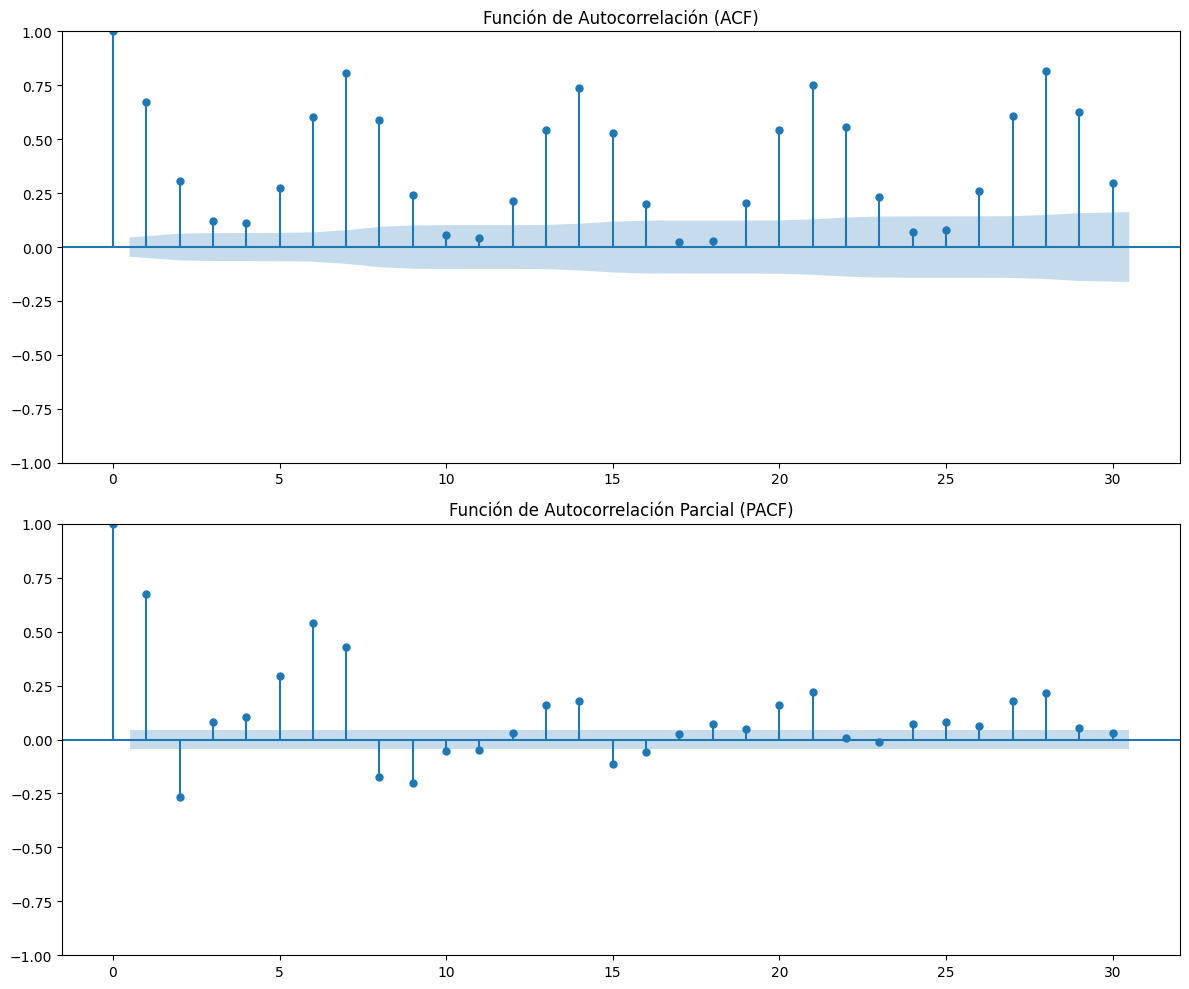

In [9]:
# Crear la figura para ACF y PACF
fig, axes = plt.subplots(2, 1, figsize=(12, 10))

# Autocorrelaci√≥n (ACF)
plot_acf(df_ts["daily_sales"], lags=30, ax=axes[0])
axes[0].set_title("Funci√≥n de Autocorrelaci√≥n (ACF)")

# Autocorrelaci√≥n Parcial (PACF)
plot_pacf(df_ts["daily_sales"], lags=30, ax=axes[1])
axes[1].set_title("Funci√≥n de Autocorrelaci√≥n Parcial (PACF)")

# Mostrar los gr√°ficos
plt.tight_layout()
plt.show()

La ACF indica un ciclo semanal en las ventas.
La PACF confirma la importancia del lag 1 y lag 7.

 La serie tiene una estacionalidad clara con periodicidad de 7 d√≠as, lo cual es esperable en datos de ventas en retail. Esto implica que los patrones de venta se repiten semanalmente.

## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.4. DESCOMPOSICION DE LA SERIE</center></h3>

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.4.1 SEMANAL</center></h4>

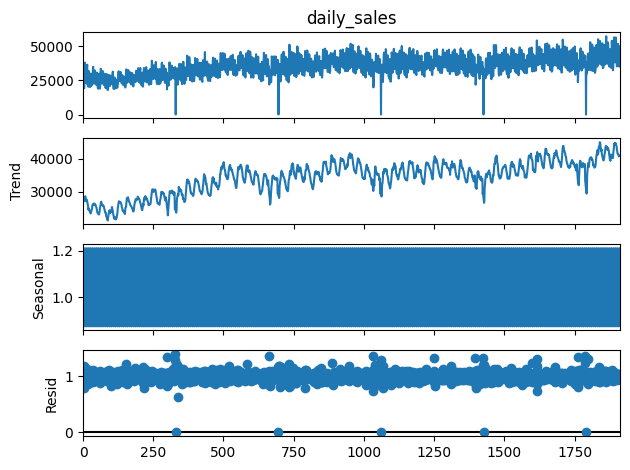

In [10]:
# Realizar la descomposici√≥n multiplicativa con per√≠odo de 7 d√≠as.
result_plot = seasonal_decompose(df_ts["daily_sales"], model="multiplicative", period=7).plot()

# Mostrar el resultado
plt.show()

<b>Serie Original</b>

Se observa la fluctuaci√≥n de las ventas diarias con una clara variabilidad a lo largo del tiempo.

<b>Tendencia</b>

Se aprecia un patr√≥n de crecimiento en la demanda a largo plazo.
La tendencia parece bastante suave, lo que sugiere que los cambios a largo plazo no son bruscos.

<b>Estacionalidad</b>

El patr√≥n estacional se repite cada 7 d√≠as, confirmando la presencia de una periodicidad semanal en las ventas.
Las fluctuaciones estacionales son proporcionales a la magnitud de la serie original, lo que valida el uso del modelo multiplicativo.

<b>Residuos</b>

Los residuos parecen aleatorios, lo cual es una buena se√±al. Sin embargo, si observamos estructuras en ellos, podr√≠a indicar que hay m√°s factores no capturados en el modelo (como eventos especiales o promociones).

Estacionalidad Semanal (period=7) ‚úÖ
Se observa un patr√≥n repetitivo cada 7 d√≠as, lo que indica que las ventas est√°n influenciadas por los d√≠as de la semana.
La funci√≥n de autocorrelaci√≥n (ACF) mostr√≥ picos en los lags 7, 14 y 21, lo que confirma esta periodicidad.
Esto sugiere que las ventas pueden ser mayores en ciertos d√≠as (como fines de semana) y menores en otros.

‚úî Conclusi√≥n: La estacionalidad semanal es clara y debe incluirse en cualquier modelo predictivo.

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.4.2 MENSUAL</center></h4>

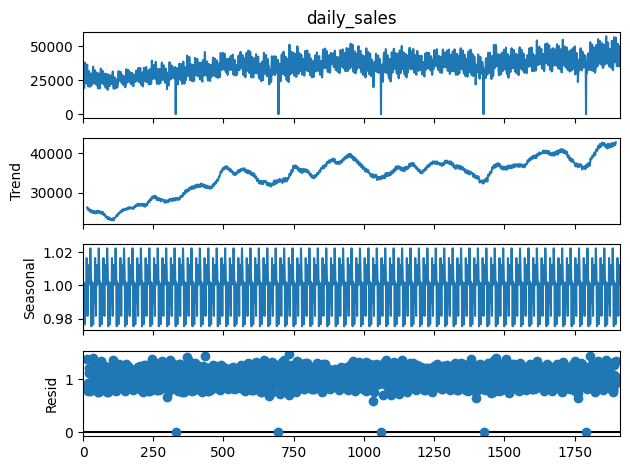

In [11]:
# Realizar la descomposici√≥n multiplicativa con per√≠odo de 30 d√≠as.
result_plot = seasonal_decompose(df_ts["daily_sales"], model="multiplicative", period=30).plot()

# Mostrar el resultado
plt.show()

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.4.3 ANUAL</center></h4>

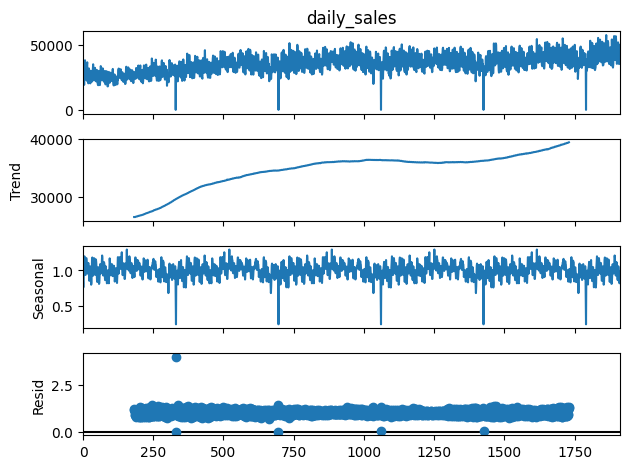

In [12]:
# Realizar la descomposici√≥n multiplicativa con per√≠odo de 365 d√≠as.
result_plot = seasonal_decompose(df_ts["daily_sales"], model="multiplicative", period=365).plot()

# Mostrar el resultado
plt.show()

3. Estacionalidad Anual (period=365) ‚úÖ
Se observa un patr√≥n repetitivo a lo largo de los a√±os, indicando que las ventas tienen ciclos anuales.
Esto puede estar influenciado por eventos como festividades, Black Friday, descuentos estacionales o tendencias de consumo.
La componente estacional muestra variaciones significativas en ciertos per√≠odos del a√±o, lo que justifica su inclusi√≥n en modelos de predicci√≥n de largo plazo.

‚úî Conclusi√≥n: La estacionalidad anual es relevante y debe considerarse en modelos de largo plazo.

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.4.4 Elecci√≥n por fuerza de la estacionalidad</center></h4>

In [13]:
def estacionalidad_fuerza(decomposition):
    """ Calcula la fuerza de la estacionalidad basada en la varianza """
    var_estacional = np.var(decomposition.seasonal.dropna())
    var_residual = np.var(decomposition.resid.dropna())
    return var_estacional / (var_estacional + var_residual)

# Calcular la fuerza de la estacionalidad en cada escala
fuerza_semanal = estacionalidad_fuerza(seasonal_decompose(df_ts['daily_sales'], model='additive', period=7))
fuerza_mensual = estacionalidad_fuerza(seasonal_decompose(df_ts['daily_sales'], model='additive', period=30))
fuerza_anual = estacionalidad_fuerza(seasonal_decompose(df_ts['daily_sales'], model='additive', period=365))

# Mostrar resultados
fuerza_estacionalidad = {
    "Semanal": fuerza_semanal,
    "Mensual": fuerza_mensual,
    "Anual": fuerza_anual
}

fuerza_estacionalidad

{'Semanal': 0.7538673050587454,
 'Mensual': 0.005527891749349202,
 'Anual': 0.4164070217724965}

La estacionalidad semanal es la m√°s fuerte, seguida de la anual, mientras que la mensual tiene una influencia m√≠nima.

## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>0.5. ESTACIONARIEDAD</center></h3>

In [14]:
result = adfuller(df_ts['daily_sales'])
print('p-value of the Dickey-Fuller test: %f' % result[1])

p-value of the Dickey-Fuller test: 0.500960


Para que la serie sea estacionaria el p-valor <= 0.05. Como muestra el resultado nuestra serie no es estacionaria.

In [15]:
# Aplicar la primera diferenciaci√≥n (d=1)
df_ts_diff = df_ts["daily_sales"].diff().dropna()

# Realizar la prueba de Dickey-Fuller despu√©s de la primera diferenciaci√≥n
adf_test_diff1 = adfuller(df_ts_diff)

# Extraer los resultados
adf_statistic_diff1 = adf_test_diff1[0]
p_value_diff1 = adf_test_diff1[1]
critical_values_diff1 = adf_test_diff1[4]

# Mostrar los resultados de la primera diferenciaci√≥n
adf_result_diff1 = {
    "Estad√≠stico ADF (d=1)": adf_statistic_diff1,
    "Valor p (d=1)": p_value_diff1,
    "Valores Cr√≠ticos": critical_values_diff1
}

adf_result_diff1

{'Estad√≠stico ADF (d=1)': -23.459578820632622,
 'Valor p (d=1)': 0.0,
 'Valores Cr√≠ticos': {'1%': -3.4338238606869878,
  '5%': -2.863074513221476,
  '10%': -2.5675869178703854}}

El valor p es 0.0 (< 0.05), lo que significa que podemos rechazar la hip√≥tesis nula y confirmar que la serie no tiene ra√≠z unitaria.

In [16]:
df_ts['daily_sales_diff'] = df_ts['daily_sales'].diff()
df_ts

date  daily_sales  Month  Weekday  daily_sales_diff
0    2011-01-29        32631      1        5               NaN
1    2011-01-30        31749      1        6         -882.0000
2    2011-01-31        23783      1        0       -7,966.0000
3    2011-02-01        25412      2        1        1,629.0000
4    2011-02-02        19146      2        2       -6,266.0000
...         ...          ...    ...      ...               ...
1908 2016-04-20        35343      4        2       -2,227.0000
1909 2016-04-21        35033      4        3         -310.0000
1910 2016-04-22        40517      4        4        5,484.0000
1911 2016-04-23        48962      4        5        8,445.0000
1912 2016-04-24        49795      4        6          833.0000

[1913 rows x 5 columns]

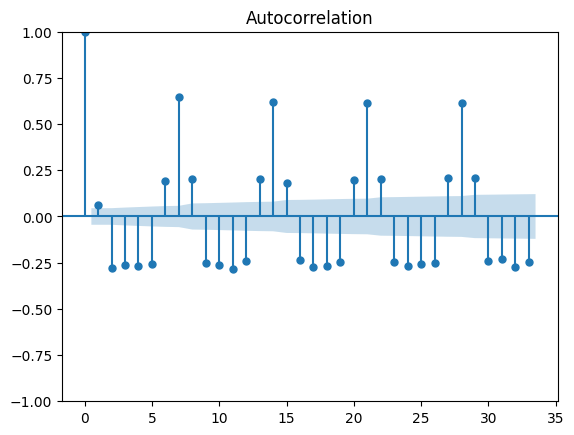

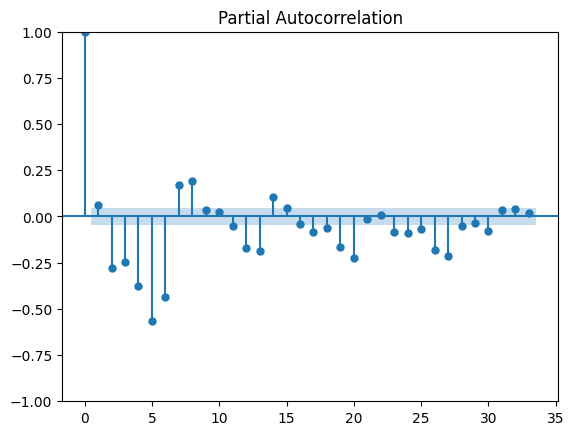

In [17]:
diff_acf = plot_acf(df_ts['daily_sales_diff'].dropna())
diff_pacf = plot_pacf(df_ts['daily_sales_diff'].dropna())

Bas√°ndonos en los gr√°ficos de ACF y PACF, podemos proponer los siguientes par√°metros para empezar:

p=1 ‚Üí La PACF tiene un corte claro en lag 1.

d=1 ‚Üí Aplicamos una diferenciaci√≥n para hacer la serie estacionaria.

q=1 o q=2 ‚Üí La ACF muestra un decrecimiento en estos lags.

P=1 ‚Üí Debido a la estacionalidad semanal.

D=1 ‚Üí Para capturar la estacionalidad diferenciada.

Q=1 ‚Üí Siguiendo la estructura de la ACF.

S=7 ‚Üí Estacionalidad semanal.

SARIMAX(1,1,1)(1,1,1,7)

# <h2 style='background:#4e4e4e; border:0; border-radius: 10px; color:black'><center>1. DESARROLLO DE MODELOS</center></h2>


## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.1. SARIMAX</center></h3>

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.1.1 PROCESAMIENTO DE DATOS</center></h4>

In [18]:
df_sarimax = df_ts.copy()
# Asegurar que la columna date sea √≠ndice
df_sarimax = df_sarimax[['date','daily_sales']]
df_sarimax = df_sarimax.set_index("date")

# Definir el porcentaje de datos para el conjunto de prueba (20% del total)
test_size = 28

# Dividir los datos en train y test
train_sarima = df_sarimax.iloc[:-test_size]
test_sarima = df_sarimax.iloc[-test_size:]

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.1.2 DESARROLLO DE PRIMER MODELO</center></h4>

In [19]:
# Estima el modelo
model_sarimax = SARIMAX(train_sarima['daily_sales'],
                    order=(1,1,1),
                    seasonal_order=(1,1,1,7)
                    )
result_sarimax = model_sarimax.fit()
result_sarimax.summary()

c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                       daily_sales   No. Observations:                 1885
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 7)   Log Likelihood              -17911.203
Date:                           Wed, 19 Mar 2025   AIC                          35832.407
Time:                                   16:23:19   BIC                          35860.094
Sample:                               01-29-2011   HQIC                         35842.605
                                    - 03-27-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5131      0.010     51.088      0.000       0.493       0.533
ma.L1         -0.9970      0.001   -971.864      0.000      -0.999      -0.995
ar.S.L7        0.2261      0.027      8.524      0.000       0.174       0.278
ma.S.L7       -0.9982      0.010   -101.055      0.000      -1.018      -0.979
sigma2      1.232e+07    1.1e-09   1.12e+16      0.000    1.23e+07    1.23e+07
===================================================================================
Ljung-Box (L1) (Q):                  20.53   Jarque-Bera (JB):             64447.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.61   Skew:                            -2.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        31.32
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 5.71e+30. Standard errors may be unstable.
"""

Los t√©rminos AR(1) y MA(1) son significativos (p-valor < 0.05), lo que indica que hay una fuerte dependencia entre las ventas actuales y las pasadas.

Los t√©rminos estacionales (AR y MA en retrasos de 7 d√≠as) son altamente significativos, lo que confirma que hay una estacionalidad semanal en las ventas.

La varianza del error (ùúé2) es bastante alta, lo que sugiere que hay una gran variabilidad en las predicciones.

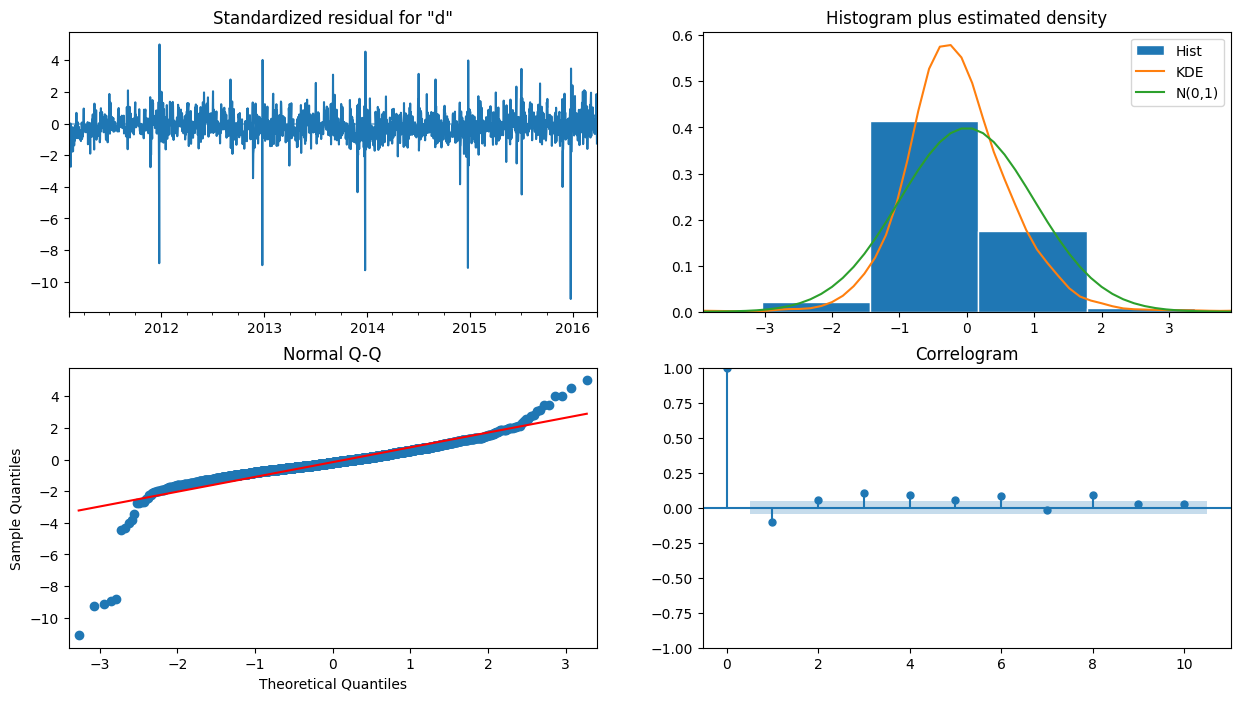

In [20]:
rcParams['figure.figsize'] = 15, 8

result_sarimax.plot_diagnostics()
plt.show()

<b>Residuals vs. Time Plot:</b>

Los residuos parecen estar distribuidos alrededor de cero, pero hay algunos picos que pueden indicar puntos at√≠picos.

<b>Histograma de los residuos:</b>

La distribuci√≥n no es perfectamente normal, lo que puede afectar la precisi√≥n de las predicciones.

<b>Q-Q Plot (Quantile-Quantile Plot):</b>

Muestra que los residuos no siguen completamente una distribuci√≥n normal, especialmente en los extremos.

<b>Correlograma de los residuos (ACF de los residuos):</b>

No hay autocorrelaci√≥n significativa en la mayor√≠a de los lags, lo cual es un buen indicador de un modelo bien ajustado.

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.1.3 DESARROLLO DE MODELO CON TRANSFORMACI√ìN LOGAR√çTMICA</center></h4>

c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.

c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency D will be used.



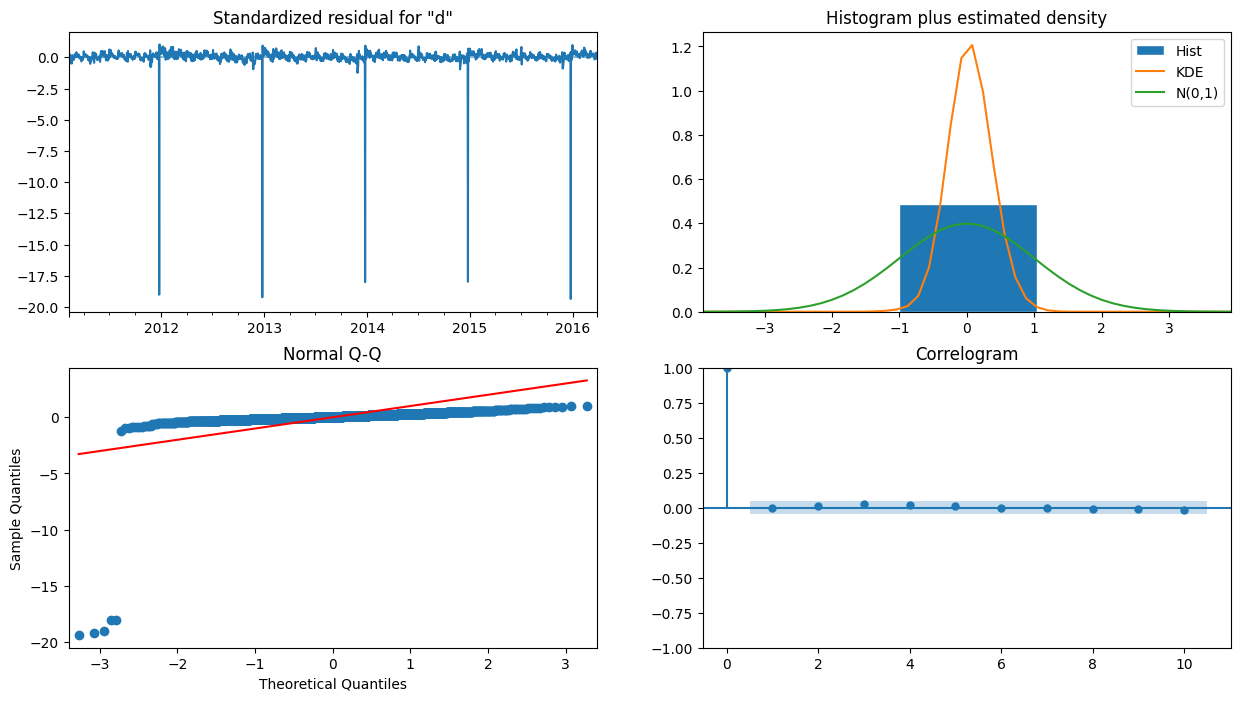

In [21]:
# Aplicar transformaci√≥n logar√≠tmica para estabilizar la varianza
df_sarimax['daily_sales_log'] = np.log1p(df_sarimax['daily_sales'])  # log(1 + x) para evitar log(0)

# Dividir en train y test con la serie transformada
train_sarima_log = df_sarimax.iloc[:-test_size]['daily_sales_log']
test_sarima_log = df_sarimax.iloc[-test_size:]['daily_sales_log']

# Ajustar modelo SARIMAX con los datos transformados
model_sarimax_log = SARIMAX(train_sarima_log,
                            order=(1,1,1),
                            seasonal_order=(1,1,1,7))

result_sarimax_log = model_sarimax_log.fit()

# Diagn√≥stico del nuevo modelo
result_sarimax_log.plot_diagnostics(figsize=(15,8))
plt.show()

Mejoras observadas:

‚úîÔ∏è Los residuos est√°n m√°s centrados alrededor de cero, lo que indica una mejor normalidad.

‚úîÔ∏è La varianza de los residuos parece m√°s estable, lo que sugiere que la transformaci√≥n ha ayudado a estabilizar la serie.

‚úîÔ∏è El histograma de residuos es m√°s cercano a una distribuci√≥n normal, mejorando la calidad del modelo.

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.1.4 PREDICCI√ìN</center></h4>

In [22]:
# Hacer predicciones en el conjunto de prueba
sarima_final_forecast = result_sarimax_log.predict(start=len(train_sarima_log),
                                                end=len(df_sarimax)-1,
                                                dynamic=False)

# Reconvertir las predicciones aplicando la exponencial inversa (para deshacer log(1+x))
sarima_final_forecast_original = np.expm1(sarima_final_forecast)

# Reconvertir los valores reales de test para comparaci√≥n
test_sarima_original = np.expm1(test_sarima_log)

# Crear la figura
fig = go.Figure()

# Agregar la serie de ventas reales
fig.add_trace(go.Scatter(x=df_sarimax.index, y=df_sarimax['daily_sales'],
                        mode='lines', name='Ventas Reales', line=dict(color='blue')))

# Agregar la serie de predicciones
fig.add_trace(go.Scatter(x=test_sarima_original.index, y=sarima_final_forecast_original,
                        mode='lines', name='Predicci√≥n SARIMA (Final)', line=dict(color='red')))

# Agregar l√≠nea vertical para indicar el inicio del conjunto de prueba
fig.add_vline(x=df_sarimax.index[-test_size], line=dict(color='black', dash='dash'), name="Inicio de Predicci√≥n")

# Configurar el dise√±o del gr√°fico
fig.update_layout(title="Predicci√≥n de Ventas en el Conjunto de Test con SARIMA Final",
                xaxis_title="Fecha",
                yaxis_title="Ventas",
                legend_title="Leyenda",
                template="plotly_white")

# Mostrar el gr√°fico interactivo
fig.show()

# Guardar predicciones en un DataFrame
df_predictions_test = pd.DataFrame({
    'date': test_sarima_original.index,
    'actual_sales': test_sarima_original.values,
    'predicted_sales': sarima_final_forecast_original.values
})

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.1.4 EVALUACI√ìN</center></h4>

In [23]:
# Calcular m√©tricas de evaluaci√≥n para el modelo SARIMA final

# MAE (Mean Absolute Error)
mae_final = mean_absolute_error(test_sarima_original, sarima_final_forecast_original)

# RMSE (Root Mean Squared Error)
rmse_final = mean_squared_error(test_sarima_original, sarima_final_forecast_original, squared=False)

# MAPE (Mean Absolute Percentage Error)
mape_final = np.mean(np.abs((test_sarima_original - sarima_final_forecast_original) / test_sarima_original)) * 100

# Crear un DataFrame con las m√©tricas
df_evaluation = pd.DataFrame({
    "M√©trica": ["MAE", "RMSE", "MAPE"],
    "Valor": [mae_final, rmse_final, mape_final]
})

df_evaluation

c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning:

'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.



M√©trica      Valor
0     MAE 2,773.9337
1    RMSE 3,463.2741
2    MAPE     6.2707

Conclusi√≥n:

‚úîÔ∏è El modelo SARIMA tiene un buen rendimiento, con un error relativamente bajo en comparaci√≥n con las ventas totales.

‚úîÔ∏è El MAPE es aceptable en problemas de predicci√≥n de ventas, indicando que el modelo predice con buena precisi√≥n.

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.1.5 PREDICCIONES A FUTURO</center></h4>

In [24]:
# Definir el rango de fechas para la predicci√≥n futura (28 d√≠as despu√©s del test)
future_dates = pd.date_range(start=df_sarimax.index[-1] + pd.Timedelta(days=1), periods=28, freq='D')

# Hacer predicciones a futuro usando el modelo SARIMA final
sarima_future_forecast = result_sarimax_log.predict(start=len(df_sarimax),
                                                    end=len(df_sarimax) + 27,
                                                    dynamic=False)

# Reconvertir las predicciones aplicando la exponencial inversa (para deshacer log(1+x))
sarima_future_forecast_original = np.expm1(sarima_future_forecast)

# Crear un DataFrame con las predicciones futuras
df_predictions_future = pd.DataFrame({
    'date': future_dates,
    'predicted_sales': sarima_future_forecast_original.values
})

# Crear la figura
fig = go.Figure()

# Agregar la serie de ventas hist√≥ricas
fig.add_trace(go.Scatter(x=df_sarimax.index, y=df_sarimax['daily_sales'],
                        mode='lines', name='Ventas Reales', line=dict(color='blue')))

# Agregar la serie de predicciones futuras
fig.add_trace(go.Scatter(x=df_predictions_future['date'], y=df_predictions_future['predicted_sales'],
                        mode='lines', name='Predicci√≥n SARIMA (Futuro)',
                        line=dict(color='green', dash='dash')))

# Agregar la serie de predicciones
fig.add_trace(go.Scatter(x=test_sarima_original.index, y=sarima_final_forecast_original,
                        mode='lines', name='Predicci√≥n SARIMA (Final)', line=dict(color='red')))

# Agregar l√≠nea vertical para indicar el inicio de la predicci√≥n futura
fig.add_vline(x=df_sarimax.index[-1], line=dict(color='black', dash='dash'), name="Inicio de Predicci√≥n")

# Configurar el dise√±o del gr√°fico
fig.update_layout(title="Predicci√≥n de Ventas para los Pr√≥ximos 28 D√≠as con SARIMA",
                xaxis_title="Fecha",
                yaxis_title="Ventas",
                legend_title="Leyenda",
                template="plotly_white")

# Mostrar el gr√°fico interactivo
fig.show()

## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.2. AUTOARIMA </center></h3>

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.2.1 PROCESAMIENTO DE DATOS</center></h4>

In [25]:
df_autoarima = df_ts.copy()
# Asegurar que la columna date sea √≠ndice
df_autoarima = df_autoarima[['date','daily_sales']]
df_autoarima = df_autoarima.set_index("date")

# Definir el porcentaje de datos para el conjunto de prueba (20% del total)
test_size = 28

# Dividir los datos en train y test
train_autoarima = df_autoarima.iloc[:-test_size]
test_autoarima = df_autoarima.iloc[-test_size:]

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.2.2 DESARROLLO DE MODELO</center></h4>

In [26]:
# Ajustar AutoARIMA con los datos de entrenamiento
modelo_autoarima = auto_arima(train_autoarima,
                            seasonal=True,
                            m=7,  # Estacionalidad semanal
                            trace=True,
                            suppress_warnings=True,
                            stepwise=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[7] intercept   : AIC=inf, Time=3.95 sec
 ARIMA(0,1,0)(0,0,0)[7] intercept   : AIC=38074.808, Time=0.03 sec
 ARIMA(1,1,0)(1,0,0)[7] intercept   : AIC=36873.005, Time=1.35 sec
 ARIMA(0,1,1)(0,0,1)[7] intercept   : AIC=37332.679, Time=2.32 sec
 ARIMA(0,1,0)(0,0,0)[7]             : AIC=38072.812, Time=0.03 sec
 ARIMA(1,1,0)(0,0,0)[7] intercept   : AIC=38071.034, Time=0.08 sec
 ARIMA(1,1,0)(2,0,0)[7] intercept   : AIC=36609.813, Time=3.34 sec
 ARIMA(1,1,0)(2,0,1)[7] intercept   : AIC=36518.046, Time=5.18 sec
 ARIMA(1,1,0)(1,0,1)[7] intercept   : AIC=36739.567, Time=2.74 sec
 ARIMA(1,1,0)(2,0,2)[7] intercept   : AIC=36260.036, Time=5.25 sec
 ARIMA(1,1,0)(1,0,2)[7] intercept   : AIC=36548.588, Time=4.99 sec
 ARIMA(0,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=4.72 sec
 ARIMA(2,1,0)(2,0,2)[7] intercept   : AIC=inf, Time=5.73 sec
 ARIMA(1,1,1)(2,0,2)[7] intercept   : AIC=inf, Time=5.85 sec
 ARIMA(0,1,1)(2,0,2)[7] intercept   : AIC=i

c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\pmdarima\arima\_auto_solvers.py:524: ModelFitWarning:

Error fitting  ARIMA(1,1,0)(2,0,2)[7]           (if you do not want to see these warnings, run with error_action="ignore").
Traceback:
Traceback (most recent call last):
  File "c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\pmdarima\arima\_auto_solvers.py", line 508, in _fit_candidate_model
    fit.fit(y, X=X, **fit_params)
  File "c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\pmdarima\arima\arima.py", line 603, in fit
    self._fit(y, X, **fit_args)
  File "c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\pmdarima\arima\arima.py", line 524, in _fit
    fit, self.arima_res_ = _fit_wrapper()
                           ^^^^^^^^^^^^^^
  File "c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\pmdarima\arima\arima.py", line 510, in _fit_wrapper
    fitted = arima.fit(
             ^^^^^^^^^^
  File "c:\Users\Administrador\.conda\

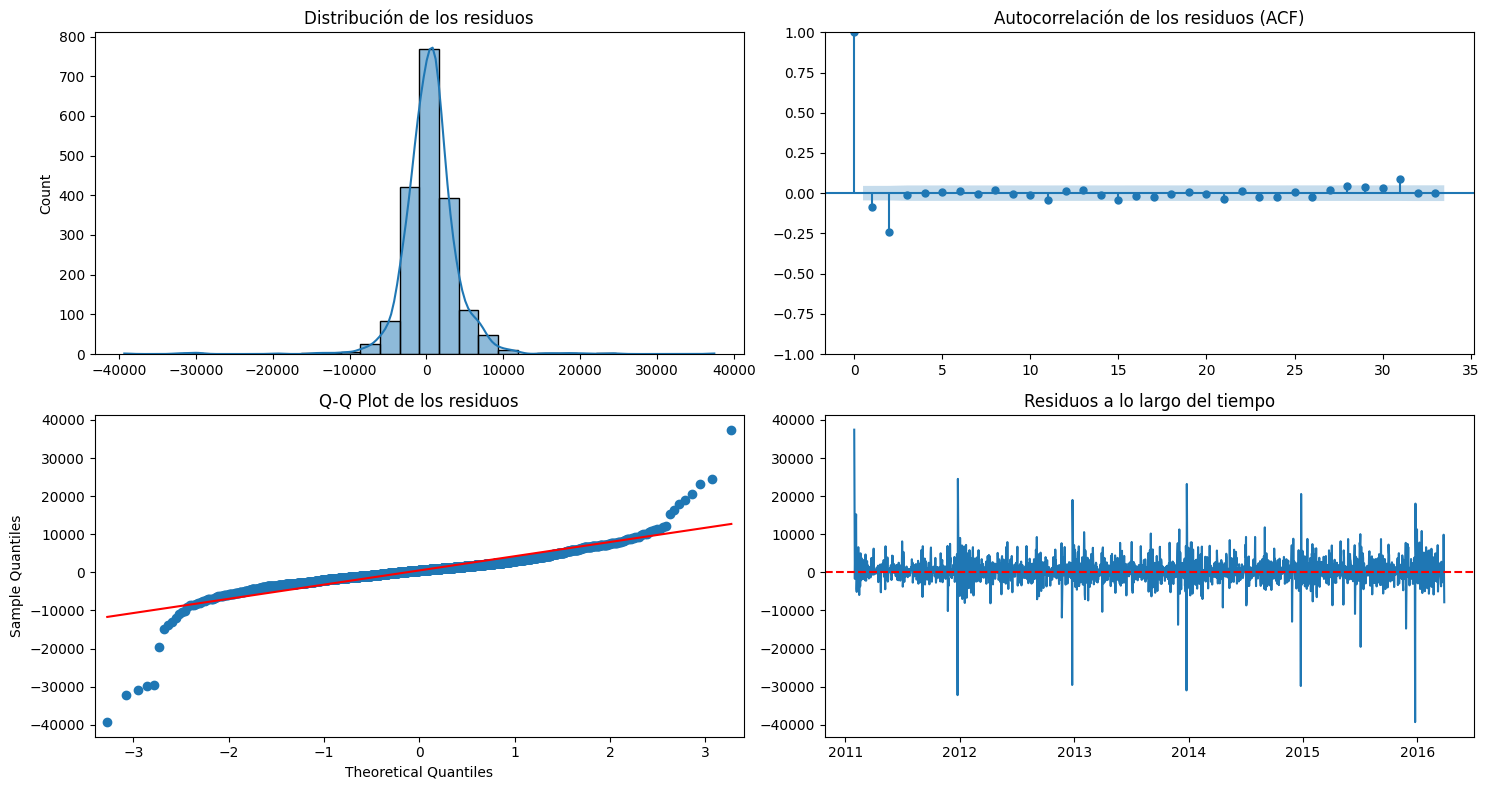

In [27]:
# Obtener residuos del modelo AutoARIMA
residuales = modelo_autoarima.resid()

# Configurar figura
fig, axes = plt.subplots(2, 2, figsize=(15, 8))

# 1. Histograma de los residuos
sns.histplot(residuales, bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title("Distribuci√≥n de los residuos")

# 2. ACF de los residuos
sm.graphics.tsa.plot_acf(residuales, ax=axes[0, 1])
axes[0, 1].set_title("Autocorrelaci√≥n de los residuos (ACF)")

# 3. Q-Q Plot para ver normalidad
sm.qqplot(residuales, line='s', ax=axes[1, 0])
axes[1, 0].set_title("Q-Q Plot de los residuos")

# 4. Gr√°fico de residuos a lo largo del tiempo
axes[1, 1].plot(residuales)
axes[1, 1].axhline(0, linestyle='dashed', color='red')
axes[1, 1].set_title("Residuos a lo largo del tiempo")

# Mostrar gr√°ficos
plt.tight_layout()
plt.show()

Parece m√°s estable y con menos valores at√≠picos, lo que sugiere que captura la tendencia general de la serie mejor. Aunque el modelo SARIMAX puede estar capturando mejor la estacionalidad.

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.2.3 PREDICCI√ìN</center></h4>

In [28]:
# Generar predicciones para el per√≠odo de prueba (28 d√≠as)
predicciones = modelo_autoarima.predict(n_periods=len(test_autoarima))
predicciones = np.array(predicciones).flatten()
# Asegurar que train_autoarima y test_autoarima sean Series y convertirlos en listas
train_autoarima_series = train_autoarima["daily_sales"] if isinstance(train_autoarima, pd.DataFrame) else train_autoarima
test_autoarima_series = test_autoarima["daily_sales"] if isinstance(test_autoarima, pd.DataFrame) else test_autoarima

# Convertir a listas
train_autoarima_list = train_autoarima_series.tolist()
test_autoarima_list = test_autoarima_series.tolist()

# Crear un DataFrame combinado con los datos de entrenamiento y prueba
df_plot = pd.DataFrame({
    "Fecha": train_autoarima_series.index.tolist() + test_autoarima_series.index.tolist(),
    "Ventas": train_autoarima_list + test_autoarima_list,
    "Tipo": ["Entrenamiento"] * len(train_autoarima_list) + ["Test"] * len(test_autoarima_list)
})

# Agregar las predicciones al DataFrame
df_predicciones = pd.DataFrame({
    "Fecha": test_autoarima_series.index,
    "Ventas": predicciones,
    "Tipo": ["Predicci√≥n AutoARIMA"] * len(predicciones)
})

# Concatenar los datos de entrenamiento, test y predicciones
df_plot = pd.concat([df_plot, df_predicciones])

# Crear el gr√°fico interactivo con Plotly Express
fig = px.line(df_plot, x="Fecha", y="Ventas", color="Tipo",
            title="Predicci√≥n de Ventas con AutoARIMA")

# Mostrar el gr√°fico interactivo
fig.show()

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.2.4 EVALUACI√ìN</center></h4>

In [29]:
# Convertir a Series asegurando que los datos sean 1D
test_autoarima_series = pd.Series(test_autoarima.values.ravel(), index=test_autoarima.index)
predicciones_series = pd.Series(predicciones.ravel(), index=test_autoarima.index)

# Calcular m√©tricas de evaluaci√≥n
mae = mean_absolute_error(test_autoarima_series, predicciones_series)
rmse = np.sqrt(mean_squared_error(test_autoarima_series, predicciones_series))
mape = np.mean(np.abs((test_autoarima_series - predicciones_series) / test_autoarima_series)) * 100

# Crear DataFrame con las m√©tricas
df_metricas = pd.DataFrame({
    "M√©trica": ["MAE", "RMSE", "MAPE"],
    "Valor": [mae, rmse, mape]
})
df_metricas

M√©trica      Valor
0     MAE 8,582.8394
1    RMSE 9,400.4989
2    MAPE    19.9633

Vemos que es mucho peor por lo que lo descartamos el Autoarima.

## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.3. PROPHET</center></h3>

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.3.1 PROCESAMIENTO DE DATOS</center></h4>

In [30]:
df_prophet = df_ts.copy()

# Definir el n√∫mero de d√≠as para el conjunto de prueba
test_days = 28

# Separar los datos en entrenamiento y prueba
train = df_prophet[:-test_days]
test = df_prophet[-test_days:]

# Mantener solo las columnas necesarias en train y test
train_prophet = train[["date", "daily_sales"]].rename(columns={"date": "ds", "daily_sales": "y"})
test_prophet = test[["date", "daily_sales"]].rename(columns={"date": "ds", "daily_sales": "y"})

special_events = pd.DataFrame({
    "ds": pd.to_datetime([
        # Super Bowl (primer domingo de febrero)
        "2011-02-06", "2012-02-05", "2013-02-03", "2014-02-02", "2015-02-01", "2016-02-07",
        # Ramadan starts (aproximado, cambia seg√∫n calendario lunar)
        "2011-08-01", "2012-07-20", "2013-07-09", "2014-06-28", "2015-06-18", "2016-06-06",
        # Thanksgiving (cuarto jueves de noviembre)
        "2011-11-24", "2012-11-22", "2013-11-28", "2014-11-27", "2015-11-26", "2016-11-24",
        # New Year (1 de enero)
        "2011-01-01", "2012-01-01", "2013-01-01", "2014-01-01", "2015-01-01", "2016-01-01",
        # Easter (Domingo de Pascua, variable)
        "2011-04-24", "2012-04-08", "2013-03-31", "2014-04-20", "2015-04-05", "2016-03-27"
    ]),
    "holiday": [
        "SuperBowl", "SuperBowl", "SuperBowl", "SuperBowl", "SuperBowl", "SuperBowl",
        "Ramadan", "Ramadan", "Ramadan", "Ramadan", "Ramadan", "Ramadan",
        "Thanksgiving", "Thanksgiving", "Thanksgiving", "Thanksgiving", "Thanksgiving", "Thanksgiving",
        "NewYear", "NewYear", "NewYear", "NewYear", "NewYear", "NewYear",
        "Easter", "Easter", "Easter", "Easter", "Easter", "Easter"
    ]
})

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.3.2 DESARROLLO DE MODELO</center></h4>

In [31]:
# Inicializar Prophet con la configuraci√≥n deseada
model_pr_events = Prophet(
    yearly_seasonality=True,
    weekly_seasonality=True,
    daily_seasonality=False,
    seasonality_mode="multiplicative",  # Modo multiplicativo para mejor ajuste
    holidays=special_events  # A√±adir eventos personalizados (SuperBowl, Ramadan, etc.)
)

# Incluir los festivos oficiales de EE.UU.
model_pr_events.add_country_holidays(country_name="US")

# Entrenar el modelo
model_pr_events.fit(train_prophet)

16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:34 - cmdstanpy - INFO - Chain [1] done processing


### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.3.3 PREDICCI√ìN</center></h4>

In [32]:
# Crear un dataframe con las fechas del conjunto de prueba
future_test = test_prophet[["ds"]].copy()

# Generar predicciones para el conjunto de prueba
forecast_test = model_pr_events.predict(future_test)

# Mostrar las primeras filas de las predicciones
forecast_test[["ds", "yhat", "yhat_lower", "yhat_upper"]].head()

ds        yhat  yhat_lower  yhat_upper
0 2016-03-28 39,504.0476 35,996.2016 43,160.7748
1 2016-03-29 36,990.3592 33,301.6329 40,512.9659
2 2016-03-30 36,626.6057 32,815.2997 40,110.1922
3 2016-03-31 37,028.5710 33,719.3292 40,705.9595
4 2016-04-01 41,551.9666 37,796.3458 45,104.8799

In [33]:
# Unir predicciones con los valores reales
results = test_prophet.copy()
results["yhat"] = forecast_test["yhat"].values
results["yhat_lower"] = forecast_test["yhat_lower"].values
results["yhat_upper"] = forecast_test["yhat_upper"].values

# Crear la figura con Plotly
fig = go.Figure()
# Agregar el intervalo de confianza (banda roja)
fig.add_trace(go.Scatter(
    x=results["ds"].tolist() + results["ds"].tolist()[::-1],
    y=results["yhat_upper"].tolist() + results["yhat_lower"].tolist()[::-1],
    fill="toself",
    fillcolor="rgba(255, 0, 0, 0.2)",
    line=dict(color="rgba(255, 0, 0, 0)"),
    name="Intervalo de confianza (80%)"
))
# Agregar las predicciones de Prophet (l√≠nea roja)
fig.add_trace(go.Scatter(
    x=results["ds"],
    y=results["yhat"],
    mode="lines",
    name="Predicciones Prophet",
    line=dict(color="red")
))
# Agregar las ventas reales (l√≠nea negra discontinua)
fig.add_trace(go.Scatter(
    x=results["ds"],
    y=results["y"],
    mode="lines",
    name="Ventas reales",
    line=dict(color="black", dash="dash")
))
# Personalizar dise√±o
fig.update_layout(
    title="Predicciones de Prophet vs. Ventas Reales",
    xaxis_title="Fecha",
    yaxis_title="Ventas diarias",
    template="plotly_white"
)
# Mostrar la gr√°fica interactiva
fig.show()


### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.3.4 EVALUACI√ìN</center></h4>

In [34]:
# Calcular m√©tricas de error
# Calcular m√©tricas de error
mae = mean_absolute_error(results["y"], results["yhat"])
rmse = np.sqrt(mean_squared_error(results["y"], results["yhat"]))
mape = mean_absolute_percentage_error(results["y"], results["yhat"])

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"MAPE: {mape:.2f}%")

MAE: 2222.23
RMSE: 2731.24
MAPE: 0.05%


El modelo es bastante bueno para captar la tendencia y estacionalidad.

Sin embargo, no predice con precisi√≥n los picos de ventas m√°s altos.

El MAE y RMSE indican que hay margen de mejora, pero en t√©rminos relativos (MAPE) el error es bajo.

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.3.5 PREDICCIONES A FUTURO</center></h4>

In [35]:
# Obtener la √∫ltima fecha en el conjunto de prueba
last_test_date = test_prophet["ds"].max()

# Crear un nuevo dataframe con 28 d√≠as despu√©s del test, asegurando continuidad
future_dates = pd.date_range(start=last_test_date, periods=29, freq="D")  # 29 en vez de 28 para unir con test
future_df = pd.DataFrame({"ds": future_dates})

# Hacer la predicci√≥n para el test + 28 d√≠as futuros
forecast_future = model_pr_events.predict(future_df)

# Concatenar las predicciones del test y la predicci√≥n futura en un solo DataFrame
full_forecast = pd.concat([results, forecast_future], ignore_index=True)

# Crear la figura con Plotly
fig = go.Figure()

# Agregar los datos de TRAIN en ROJO (l√≠nea s√≥lida)
fig.add_trace(go.Scatter(
    x=train_prophet["ds"],
    y=train_prophet["y"],
    mode="lines",
    name="Datos Reales (Train)",
    line=dict(color="red")
))
# Agregar el intervalo de confianza en el TEST (banda roja)
fig.add_trace(go.Scatter(
    x=results["ds"].tolist() + results["ds"].tolist()[::-1],
    y=results["yhat_upper"].tolist() + results["yhat_lower"].tolist()[::-1],
    fill="toself",
    fillcolor="rgba(255, 0, 0, 0.2)",
    line=dict(color="rgba(255, 0, 0, 0)"),
    name="Intervalo de confianza (Test)"
))
# Agregar las predicciones del TEST en ROJO
fig.add_trace(go.Scatter(
    x=results["ds"],
    y=results["yhat"],
    mode="lines",
    name="Predicciones Prophet (Test)",
    line=dict(color="red", dash="dot")
))
# Agregar las ventas reales del TEST (l√≠nea negra discontinua)
fig.add_trace(go.Scatter(
    x=results["ds"],
    y=results["y"],
    mode="lines",
    name="Ventas reales (Test)",
    line=dict(color="black", dash="dash")
))
# Agregar el intervalo de confianza en la predicci√≥n futura (banda azul)
fig.add_trace(go.Scatter(
    x=forecast_future["ds"].tolist() + forecast_future["ds"].tolist()[::-1],
    y=forecast_future["yhat_upper"].tolist() + forecast_future["yhat_lower"].tolist()[::-1],
    fill="toself",
    fillcolor="rgba(0, 0, 255, 0.2)",
    line=dict(color="rgba(0, 0, 255, 0)"),
    name="Intervalo de confianza (Futuro)"
))
# Agregar las predicciones futuras en AZUL
fig.add_trace(go.Scatter(
    x=forecast_future["ds"],
    y=forecast_future["yhat"],
    mode="lines",
    name="Predicciones Prophet (Futuro)",
    line=dict(color="blue")
))
# Personalizar dise√±o
fig.update_layout(
    title="Predicciones de Prophet",
    xaxis_title="Fecha",
    yaxis_title="Ventas diarias",
    template="plotly_white"
)
# Mostrar la gr√°fica interactiva
fig.show()

El modelo con eventos captura mejor los picos de ventas en fechas clave.

La reducci√≥n del MAE y RMSE indica que las predicciones son m√°s precisas cuando se consideran los eventos.

MAPE sigue siendo muy bajo, lo que significa que los errores siguen siendo peque√±os en relaci√≥n con el volumen total de ventas.

## <h3 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.4. MACHINE LEARNING</center></h3>

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.4.1 FUNCION DE DESARROLLO DE MODELOS ML</center></h4>

In [36]:
def train_evaluate_models(df, group, type):
    df_prueba = df.groupby('date').agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
}).reset_index().copy()
    df_prueba.loc[df_prueba['daily_sales'] == 0, 'daily_sales'] += 1
    df_prueba.set_index("date", inplace=True)

    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    test_days = 28
    df_prueba.sort_index(inplace=True)
    df_prueba.dropna(inplace=True)
    train_X = df_prueba.iloc[:-test_days][columns_X]
    train_y = df_prueba.iloc[:-test_days][columns_y]
    test_X = df_prueba.iloc[-test_days:][columns_X]
    test_y = df_prueba.iloc[-test_days:][columns_y]

    train_y = train_y.asfreq('D')  # Forzar frecuencia diaria
    test_y = test_y.asfreq('D')  # Aplicar tambi√©n al conjunto de prueba

    models = {
        'XGBoost': XGBRegressor(random_state=42),
        'CatBoost': CatBoostRegressor(random_state=42),
        'LightGBM': LGBMRegressor(random_state=42)
    }
    metrics = {}
    predictions = {}
    predictions_future = {}
    for name, model in models.items():
        validation_size = len(test_y)
        fh = ForecastingHorizon(np.arange(1, 29), is_relative=True)
        forecaster = TransformedTargetForecaster(
            [
                ("deseasonalize_28", Deseasonalizer(model="multiplicative", sp=28)),  # Quita estacionalidad mensual (28 d√≠as)
                ("LogTransformer", LogTransformer()),  # Aplica transformaci√≥n logar√≠tmica
                ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),  # Elimina tendencia lineal
                ("forecast", make_reduction(model, window_length=28, strategy="recursive", scitype='tabular-regressor')),  # Usa XGBoost con ventana de 28 d√≠as
            ]
        )
        # Ajustar Expanding Window Cross-Validation
        cv = SlidingWindowSplitter(
            window_length=28*6,  # 6 meses de historial en cada fold
            fh=fh,  # Predicci√≥n de 28 d√≠as
            step_length=validation_size  # Se mueve 1 mes en cada iteraci√≥n
        )
        # üîπ Ajustar la grilla de hiperpar√°metros para XGBoost
        if name == "XGBoost":
            param_grid = {
            'forecast__estimator__max_depth': [3, 4, 5],
            'forecast__estimator__learning_rate': [0.05, 0.1],
            'forecast__estimator__n_estimators': [100, 200],
            'forecast__estimator__subsample': [0.7, 0.8, 0.9],
            'forecast__estimator__colsample_bytree': [0.6, 0.8],
            }
        elif name == "LightGBM":
            param_grid = {
            'forecast__estimator__max_depth': [3, 4, 5],
            'forecast__estimator__learning_rate': [0.05, 0.1],
            'forecast__estimator__n_estimators': [100, 200],
            'forecast__estimator__subsample': [0.7, 0.8, 0.9],
            'forecast__estimator__colsample_bytree': [0.6, 0.8],
            }
        elif name == "CatBoost":
            param_grid = {
            'forecast__estimator__depth': [3, 4, 5],
            'forecast__estimator__learning_rate': [0.1, 0.3],
            'forecast__estimator__iterations': [25, 50, 100],
            'forecast__estimator__colsample_bylevel': [0.7, 0.8]
            }

        # üîπ Aplicar b√∫squeda de hiperpar√°metros con RandomizedSearchCV
        rscv = ForecastingRandomizedSearchCV(
            forecaster,
            cv=cv,  # Expanding Window CV ajustado a la serie
            param_distributions=param_grid,
            n_iter=10,
            random_state=42,
            error_score='raise',
            n_jobs=-1
        )
        # Entrenar el modelo
        # üîπ Asegurar que `test_y.index` sea `PeriodIndex` o `DatetimeIndex`
        if isinstance(test_y.index, pd.PeriodIndex):
            ultimo_dia_test = test_y.index[-1].to_timestamp()  # Convertir a Timestamp
        else:
            ultimo_dia_test = test_y.index[-1]  # Ya es un Timestamp

        # üîπ Generar un rango de fechas para los pr√≥ximos 28 d√≠as con el mismo tipo de √≠ndice que `test_y`
        fechas_futuras = pd.date_range(start=ultimo_dia_test + pd.Timedelta(days=1), periods=28, freq="D")

        # üîπ Asegurar que `fhos` tenga el mismo tipo de √≠ndice que el modelo
        if isinstance(test_y.index, pd.PeriodIndex):
            fhos = ForecastingHorizon(pd.PeriodIndex(fechas_futuras, freq="D"), is_relative=False)
        else:
            fhos = ForecastingHorizon(fechas_futuras, is_relative=False)  # Dejar como `DatetimeIndex`

        # üîπ Entrenar el modelo con los datos hasta `train_y`
        print(f"Entrenando {name}...")
        rscv.fit(X=train_X,y=train_y)
        y_pred_transf_cv = rscv.best_forecaster_.predict(fh=fh, X=test_X)
        # üîπ Predecir los 28 d√≠as siguientes al test
        future_X = test_X.copy()
        future_X.index = fechas_futuras  # Establecer las fechas futuras como √≠ndice
        future_X["year"] = future_X.index.year
        future_X["month"] = future_X.index.month
        future_X["quarter"] = future_X.index.quarter
        future_X["week"] = future_X.index.isocalendar().week + 1
        future_X["day"] = future_X.index.day
        future_X["weekday_int"] = future_X.index.weekday
        map_dias = {0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 1, 6: 2}
        future_X["weekday_int"] = future_X["weekday_int"].map(map_dias)
        future_X["holidays_boolean"] = 0  # Asumimos que no hay festivos por defecto
        future_X["event_boolean"] = 0  # Asumimos que no hay eventos por defecto
        y_pred_transf_oos = rscv.best_forecaster_.predict(fh=fhos, X=future_X)
        metrics[name] = {
            'model': name,
            'MAPE': mean_absolute_percentage_error(test_y, y_pred_transf_cv, symmetric=False),
            'MAE': mean_absolute_error(test_y, y_pred_transf_cv),
            'RMSE': root_mean_squared_error(test_y, y_pred_transf_cv),
            'GROUP' : group,
            'type' : type,
        }
        predictions[name] = y_pred_transf_cv
        predictions_future[name] = y_pred_transf_oos
    df_metrics = pd.DataFrame(metrics).T
    # üîπ Crear el DataFrame con las fechas de entrenamiento, test y futuro
    df_plot = pd.DataFrame({
        "Fecha": np.concatenate([train_y.index.to_numpy(), test_y.index.to_numpy(), y_pred_transf_oos.index.to_numpy()]),
        "Ventas Reales": np.concatenate([train_y.values.ravel(), test_y.values.ravel(), np.full(len(y_pred_transf_oos), np.nan)])
    })

    # üîπ Agregar las predicciones de cada modelo en test y futuro
    for name in predictions:
        preds = np.array(predictions[name]).ravel()
        preds_future = np.array(predictions_future[name]).ravel()

        df_plot[f"Predicciones {name}"] = np.concatenate([
            np.full(len(train_y), np.nan),  # Mantener NaN en la parte de entrenamiento
            preds,  # Predicciones en Test
            preds_future  # Predicciones Futuras
        ])

    # üîπ Crear la figura y agregar las ventas reales
    fig = go.Figure()
    # Agregar la serie de ventas reales
    fig.add_trace(go.Scatter(
        x=df_plot["Fecha"], y=df_plot["Ventas Reales"],
        mode='lines', name="Ventas Reales",
        line=dict(color='black', width=2)
    ))
    # üîπ Agregar cada modelo con su respectiva predicci√≥n
    colors = ['red', 'blue', 'green', 'purple', 'orange']  # Colores para los modelos
    for i, name in enumerate(predictions):
        fig.add_trace(go.Scatter(
            x=df_plot["Fecha"], y=df_plot[f"Predicciones {name}"],
            mode='lines', name=f"Predicciones {name}",
            line=dict(color=colors[i % len(colors)], width=1.5)  # Rotar colores si hay m√°s modelos
        ))

    # üîπ Configurar dise√±o del gr√°fico
    fig.update_layout(
        title=f"Predicci√≥n de Ventas con Modelos de Machine Learning en {group}",
        xaxis_title="Fecha",
        yaxis_title="Ventas",
        template="plotly_white",
        legend_title="Tipo de Datos",
    )

    # Mostrar la gr√°fica interactiva con selecci√≥n de modelos
    fig.show()

    return df_metrics

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.4.2 AGRUPACIONES PARA HACER MIDDLE TO BOTTOM</center></h4>

#### GLOBAL

In [ ]:
df_metrics_global = train_evaluate_models(df,"GLOBAL",type="Global")
df_metrics_agrupaciones = df_metrics_global
df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### TIENDAS

In [ ]:
for store in df.store.unique():
    print(store)
    df_store = df[df["store"] == store]
    group = store
    type = "Store"
    df_metrics_store = train_evaluate_models(df_store, group, type= type)
    df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_store], axis = 0)
    df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### CATEGORIA

In [ ]:
for category in df.category.unique():
    print(category)
    df_category = df[df["category"] == category]
    group = category
    type = "Category"
    df_metrics_category = train_evaluate_models(df_category, group, type=type)
    df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_category], axis = 0)
    df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### DEPARTAMENTOS

In [ ]:
for department in df.department.unique():
    print(department)
    df_department = df[df["department"] == department]
    group = department
    type = "Department"
    df_metrics_department = train_evaluate_models(df_department, group, type=type)
    df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_department], axis = 0)
    df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### REGION

In [ ]:
for region in df.region.unique():
    print(region)
    df_region = df[df["region"] == region]
    group = region
    type = "region"
    df_metrics_region = train_evaluate_models(df_region, group, type=type)
    df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_region], axis = 0)
    df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### REGION / CATEGORIA

In [ ]:
for region in df.region.unique():
    print(region)
    for category in df.category.unique():
        print(category)
        df_region_cat = df[(df.region == region) & (df.category == category)]
        group = region+"_"+category
        type = " Region_Category"
        df_metrics_regcat = train_evaluate_models(df_region_cat, group, type = type)
        df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_regcat], axis = 0)
        df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### REGION / DEPARTAMENTO

In [ ]:
for region in df.region.unique():
    print(region)
    for department in df.department.unique():
        print(department)
        df_region_dep = df[(df.region == region) & (df.department == department)]
        group = region+"_"+department
        type = "Region_Department"
        df_metrics_regdep = train_evaluate_models(df_region_dep, group, type = type)
        df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_regdep], axis = 0)
        df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### TIENDA / CATEGORIA

In [ ]:
for store in df.store.unique():
    print(store)
    for category in df.category.unique():
        print(category)
        df_store_cat = df[(df.store == store) & (df.category == category)]
        group = store+"_"+category
        type = "Store_Category"
        df_metrics_stocat = train_evaluate_models(df_store_cat, group, type = type)
        df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_stocat], axis = 0)
        df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv")

#### CLUSTERS DE ITEMS

In [ ]:
df_clusters = pd.read_pickle('ids_mes_por_cluster.pkl')
df_clusters['cluster'] = df_clusters['cluster'] + 1
for key, value in df_clusters.ids.to_dict().items():
    print(f"Cluster {key}")
    df.loc[df['item'].isin(value), 'cluster'] = key
df['cluster'] = df['cluster'] + 1

In [ ]:
for cluster in sorted(df["cluster"].unique()):
    print(cluster)
    df_cluster = df[df["cluster"] == cluster]
    group = "CLUSTER_" + str(cluster)
    type = "Cluster"
    df_metrics_cluster = train_evaluate_models(df_cluster, group, type=type)
    df_metrics_agrupaciones = pd.concat([df_metrics_agrupaciones, df_metrics_cluster], axis = 0)
    df_metrics_agrupaciones.to_csv("df_metrics_agrupaciones.csv", index=False)

#### CLUSTERS DE SERIES TEMPORALES

In [ ]:
df_clusters_temp = pd.read_pickle("df_cluster_ST.pkl")
df_clusters_temp['cluster_base_on_dtw'] = df_clusters_temp['cluster_base_on_dtw'].astype(int)
df_clusters_temp['cluster_base_on_dtw'] = df_clusters_temp['cluster_base_on_dtw'] + 1
clustered_items = df_clusters_temp.groupby("cluster_base_on_dtw")["item"].apply(list).reset_index()
for key, value in clustered_items.item.to_dict().items():
    print(f"Cluster {key}")
    df.loc[df['item'].isin(value), 'cluster_base_on_dtw'] = key


Cluster 0
Cluster 1
Cluster 2
Cluster 3


In [ ]:
for cluster in sorted(df["cluster_base_on_dtw"].unique()):
    print(cluster)
    df_cluster_tmp = df[df["cluster_base_on_dtw"] == cluster]
    group = "CLUSTERTMP_" + str(cluster)
    type = "Cluster_TMP"
    df_metrics_clustertmp = train_evaluate_models(df_cluster_tmp, group, type=type)
    df_metrics = pd.concat([df_metrics, df_metrics_clustertmp], axis = 0)
    df_metrics.to_csv("df_metrics_agrupaciones.csv", index=False)

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>1.4.3 EVALUACI√ìN PARA ELECCI√ìN MEJOR MODELO</center></h4>

In [ ]:
df_metrics_agrupaciones = pd.read_csv('df_metrics_agrupaciones.csv')
df_metrics_agrupaciones

model      MAPE          MAE         RMSE              GROUP  \
0     XGBoost  0.029841  1303.664260  1706.926852             GLOBAL   
1    CatBoost  0.036771  1557.116939  1882.186618             GLOBAL   
2    LightGBM  0.035788  1508.425792  1828.034086             GLOBAL   
3     XGBoost  0.063335   302.626987   609.857797  Greenwich_Village   
4    CatBoost  0.052750   243.295356   339.502460  Greenwich_Village   
..        ...       ...          ...          ...                ...   
301  CatBoost  0.068342   262.305584   312.857632     CLUSTERTMP_2.0   
302  LightGBM  0.176014   717.861448   768.170081     CLUSTERTMP_2.0   
303   XGBoost  0.054114   577.972024   693.313875     CLUSTERTMP_3.0   
304  CatBoost  0.052004   564.043960   731.579766     CLUSTERTMP_3.0   
305  LightGBM  0.064519   691.591765   797.615874     CLUSTERTMP_3.0   

            type  
0         Global  
1         Global  
2         Global  
3          Store  
4          Store  
..           ...  
301  Cluster_TMP  
302  Cluster_TMP  
303  Cluster_TMP  
304  Cluster_TMP  
305  Cluster_TMP  

[306 rows x 6 columns]

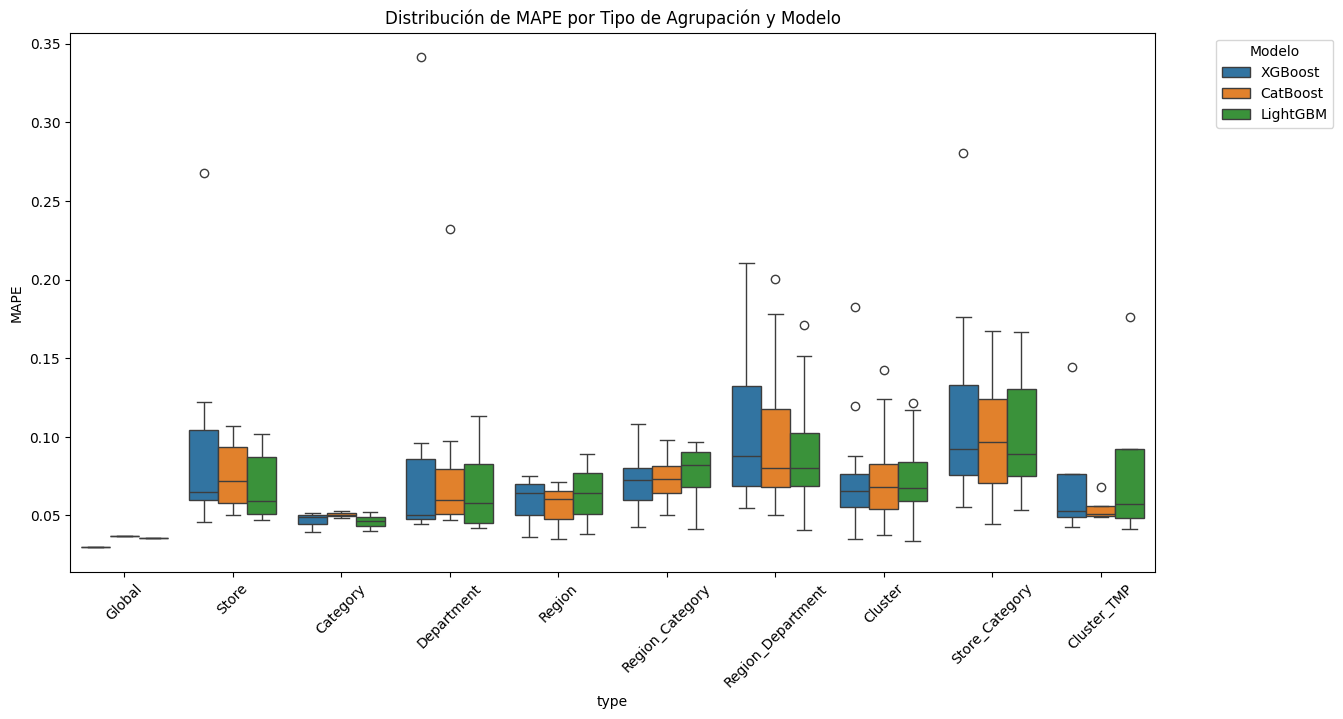

In [5]:
# Visualizaci√≥n de MAPE diferenciado por modelo y tipo de agrupaci√≥n
plt.figure(figsize=(14, 7))
sns.boxplot(x="type", y="MAPE", hue="model", data=df_metrics_agrupaciones)
plt.title("Distribuci√≥n de MAPE por Tipo de Agrupaci√≥n y Modelo")
plt.xticks(rotation=45)
plt.legend(title="Modelo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

Aqu√≠ podemos comparar las diferentes opciones para elegir el mejor modelo. Y podemos ver como seleccionando la opci√≥n Cluster obtenemos el mejor MAPE con XGBoost teniendo en cuenta que la agrupaci√≥n es m√°s especifica y por lo tanto tendremos menos error en la elecci√≥n de los pesos cuando tengamos que repartir los pesos individuales de los ID.

# <h2 style='background:#4e4e4e; border:0; border-radius: 10px; color:black'><center>2. MODELO DEFINITIVO</center></h2>

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>2.1 FUNCION DE MODELO DEFINITIVO</center></h4>

In [7]:
def train_evaluate_models(df, group, type):
    df_prueba = df.groupby('date').agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
}).reset_index().copy()
    df_prueba.loc[df_prueba['daily_sales'] == 0, 'daily_sales'] += 1
    df_prueba.set_index("date", inplace=True)

    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    test_days = 28
    df_prueba.sort_index(inplace=True)
    df_prueba.dropna(inplace=True)
    train_X = df_prueba.iloc[:-test_days][columns_X]
    train_y = df_prueba.iloc[:-test_days][columns_y]
    test_X = df_prueba.iloc[-test_days:][columns_X]
    test_y = df_prueba.iloc[-test_days:][columns_y]

    train_y = train_y.asfreq('D')  # Forzar frecuencia diaria
    test_y = test_y.asfreq('D')  # Aplicar tambi√©n al conjunto de prueba

    models = {
        'XGBoost': XGBRegressor(random_state=42),
    }
    metrics = {}
    predictions = {}
    predictions_future = {}
    for name, model in models.items():
        validation_size = len(test_y)
        fh = ForecastingHorizon(np.arange(1, 29), is_relative=True)
        forecaster = TransformedTargetForecaster(
            [
                ("deseasonalize_28", Deseasonalizer(model="multiplicative", sp=28)),  # Quita estacionalidad mensual (28 d√≠as)
                ("LogTransformer", LogTransformer()),  # Aplica transformaci√≥n logar√≠tmica
                ("detrend", Detrender(forecaster=PolynomialTrendForecaster(degree=1))),  # Elimina tendencia lineal
                ("forecast", make_reduction(model, window_length=28, strategy="recursive", scitype='tabular-regressor')),  # Usa XGBoost con ventana de 28 d√≠as
            ]
        )
        # Ajustar Expanding Window Cross-Validation
        cv = SlidingWindowSplitter(
            window_length=28*6,  # 6 meses de historial en cada fold
            fh=fh,  # Predicci√≥n de 28 d√≠as
            step_length=validation_size  # Se mueve 1 mes en cada iteraci√≥n
        )
        # üîπ Ajustar la grilla de hiperpar√°metros para XGBoost
        if name == "XGBoost":
            param_grid = {
            'forecast__estimator__max_depth': [3, 4, 5],
            'forecast__estimator__learning_rate': [0.05, 0.1],
            'forecast__estimator__n_estimators': [100, 200],
            'forecast__estimator__subsample': [0.7, 0.8, 0.9],
            'forecast__estimator__colsample_bytree': [0.6, 0.8],
            }

        # üîπ Aplicar b√∫squeda de hiperpar√°metros con RandomizedSearchCV
        rscv = ForecastingRandomizedSearchCV(
            forecaster,
            cv=cv,  # Expanding Window CV ajustado a la serie
            param_distributions=param_grid,
            n_iter=10,
            random_state=42,
            error_score='raise',
            n_jobs=-1
        )
        # Entrenar el modelo
        # üîπ Asegurar que `test_y.index` sea `PeriodIndex` o `DatetimeIndex`
        if isinstance(test_y.index, pd.PeriodIndex):
            ultimo_dia_test = test_y.index[-1].to_timestamp()  # Convertir a Timestamp
        else:
            ultimo_dia_test = test_y.index[-1]  # Ya es un Timestamp

        # üîπ Generar un rango de fechas para los pr√≥ximos 28 d√≠as con el mismo tipo de √≠ndice que `test_y`
        fechas_futuras = pd.date_range(start=ultimo_dia_test + pd.Timedelta(days=1), periods=28, freq="D")

        # üîπ Asegurar que `fhos` tenga el mismo tipo de √≠ndice que el modelo
        if isinstance(test_y.index, pd.PeriodIndex):
            fhos = ForecastingHorizon(pd.PeriodIndex(fechas_futuras, freq="D"), is_relative=False)
        else:
            fhos = ForecastingHorizon(fechas_futuras, is_relative=False)  # Dejar como `DatetimeIndex`

        # üîπ Entrenar el modelo con los datos hasta `train_y`
        print(f"Entrenando {name}...")
        rscv.fit(X=train_X,y=train_y)
        best_model = rscv.best_forecaster_
        y_pred_transf_cv = rscv.best_forecaster_.predict(fh=fh, X=test_X)
        # üîπ Predecir los 28 d√≠as siguientes al test
        future_X = test_X.copy()
        future_X.index = fechas_futuras  # Establecer las fechas futuras como √≠ndice
        future_X["year"] = future_X.index.year
        future_X["month"] = future_X.index.month
        future_X["quarter"] = future_X.index.quarter
        future_X["week"] = future_X.index.isocalendar().week + 1
        future_X["day"] = future_X.index.day
        future_X["weekday_int"] = future_X.index.weekday
        map_dias = {0: 3, 1: 4, 2: 5, 3: 6, 4: 7, 5: 1, 6: 2}
        future_X["weekday_int"] = future_X["weekday_int"].map(map_dias)
        future_X["holidays_boolean"] = 0  # Asumimos que no hay festivos
        future_X["event_boolean"] = 0  # Asumimos que no hay eventos
        y_pred_transf_oos = rscv.best_forecaster_.predict(fh=fhos, X=future_X)
        metrics[name] = {
            'model': name,
            'MAPE': mean_absolute_percentage_error(test_y, y_pred_transf_cv, symmetric=False),
            'MAE': mean_absolute_error(test_y, y_pred_transf_cv),
            'RMSE': root_mean_squared_error(test_y, y_pred_transf_cv),
            'GROUP' : group,
            'type' : type,
        }
        predictions[name] = y_pred_transf_cv
        predictions_future[name] = y_pred_transf_oos
    df_metrics = pd.DataFrame(metrics).T
    # üîπ Crear el DataFrame con las fechas de entrenamiento, test y futuro
    df_plot = pd.DataFrame({
        "Fecha": np.concatenate([train_y.index.to_numpy(), test_y.index.to_numpy(), y_pred_transf_oos.index.to_numpy()]),
        "Ventas Reales": np.concatenate([train_y.values.ravel(), test_y.values.ravel(), np.full(len(y_pred_transf_oos), np.nan)])
    })

    # üîπ Agregar las predicciones de cada modelo en test y futuro
    for name in predictions:
        preds = np.array(predictions[name]).ravel()
        preds_future = np.array(predictions_future[name]).ravel()

        df_plot[f"Predicciones {name}"] = np.concatenate([
            np.full(len(train_y), np.nan),  # Mantener NaN en la parte de entrenamiento
            preds,  # Predicciones en Test
            preds_future  # Predicciones Futuras
        ])

    # üîπ Crear la figura y agregar las ventas reales
    fig = go.Figure()
    # Agregar la serie de ventas reales
    fig.add_trace(go.Scatter(
        x=df_plot["Fecha"], y=df_plot["Ventas Reales"],
        mode='lines', name="Ventas Reales",
        line=dict(color='black', width=2)
    ))
    # üîπ Agregar cada modelo con su respectiva predicci√≥n
    colors = ['red', 'blue', 'green', 'purple', 'orange']  # Colores para los modelos
    for i, name in enumerate(predictions):
        fig.add_trace(go.Scatter(
            x=df_plot["Fecha"], y=df_plot[f"Predicciones {name}"],
            mode='lines', name=f"Predicciones {name}",
            line=dict(color=colors[i % len(colors)], width=1.5)  # Rotar colores si hay m√°s modelos
        ))

    # üîπ Configurar dise√±o del gr√°fico
    fig.update_layout(
        title=f"Predicci√≥n de Ventas con Modelos de Machine Learning en {group}",
        xaxis_title="Fecha",
        yaxis_title="Ventas",
        template="plotly_white",
        legend_title="Tipo de Datos",
    )

    # Mostrar la gr√°fica interactiva con selecci√≥n de modelos
    fig.show()

    return df_metrics, best_model, predictions, predictions_future

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>2.2 DESARROLLO DEL MODELO</center></h4>

In [8]:
df_metrics = pd.DataFrame()
models_cluster = {}
list_pred_cluster = {}
list_pred_fut_cluster = {}
for cluster in sorted(df["cluster_base_on_dtw"].unique()):
    print(cluster)
    df_cluster = df[df["cluster_base_on_dtw"] == cluster]
    group = "CLUSTER_" + str(cluster)
    type = "cluster_base_on_dtw"
    df_metrics_cluster, model, list_pred, list_pred_fut = train_evaluate_models(df_cluster, group, type=type)
    models_cluster[group] = model
    list_pred_cluster[group] = list_pred
    list_pred_fut_cluster[group] = list_pred_fut
    df_metrics = pd.concat([df_metrics, df_metrics_cluster], axis = 0)
    df_metrics.to_csv("df_metrics_definitive.csv", index=False)
    with open("models_cluster.pkl", "wb") as f:
        pickle.dump(models_cluster, f)

    with open("list_pred_cluster.pkl", "wb") as f:
        pickle.dump(list_pred_cluster, f)

    with open("list_pred_fut_cluster.pkl", "wb") as f:
        pickle.dump(list_pred_fut_cluster, f)

0.0


c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\sktime\forecasting\model_selection\_tune.py:90: UserWarning: Parameter n_jobs of ForecastingRandomizedSearchCV has been removed in sktime 0.27.0 and is no longer used. It is ignored when passed. Instead, the backend and backend_params parameters should be used to pass n_jobs or other parallelization parameters.
  warn(


Entrenando XGBoost...


1.0


c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\sktime\forecasting\model_selection\_tune.py:90: UserWarning:

Parameter n_jobs of ForecastingRandomizedSearchCV has been removed in sktime 0.27.0 and is no longer used. It is ignored when passed. Instead, the backend and backend_params parameters should be used to pass n_jobs or other parallelization parameters.



Entrenando XGBoost...


2.0


c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\sktime\forecasting\model_selection\_tune.py:90: UserWarning:

Parameter n_jobs of ForecastingRandomizedSearchCV has been removed in sktime 0.27.0 and is no longer used. It is ignored when passed. Instead, the backend and backend_params parameters should be used to pass n_jobs or other parallelization parameters.



Entrenando XGBoost...


3.0


c:\Users\Administrador\.conda\envs\Nuclio\Lib\site-packages\sktime\forecasting\model_selection\_tune.py:90: UserWarning:

Parameter n_jobs of ForecastingRandomizedSearchCV has been removed in sktime 0.27.0 and is no longer used. It is ignored when passed. Instead, the backend and backend_params parameters should be used to pass n_jobs or other parallelization parameters.



Entrenando XGBoost...


Con este c√≥digo estamos guardando los modelos de cada cluster, sus m√©tricas y sus predicciones.

# <h2 style='background:#4e4e4e; border:0; border-radius: 10px; color:black'><center>3. CALCULO DE PESOS</center></h2>

### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>3.1 M√âTODOS DE OBTENCI√ìN PESOS</center></h4>

#### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>3.1.1 MACHINE LEARNING</center></h4>

In [ ]:
df_general = df.copy()
df_general['total_sales_cluster'] = df_general.groupby(['cluster', 'date'])['daily_sales'].transform('sum')
df_general['peso_id'] = df_general['daily_sales'] / df_general['total_sales_cluster']

df_general['peso_id'] = df_general['peso_id'].fillna(0)
df_general["cluster"] = df_general["cluster"].astype(int)

# Obtener la fecha m√°s reciente del DataFrame
max_date = df_general['date'].max()
# Calcular la fecha de hace dos a√±os desde la fecha m√°s reciente
two_years_ago = max_date - pd.offsets.DateOffset(years=2)
# Filtrar el DataFrame para incluir solo los √∫ltimos dos a√±os
df_general = df_general[df_general['date'] >= two_years_ago]

#VARIABLES DEL MODELO ("FEATURE ENGINEERING")
df_general["mean_month_sales"] = df_general.groupby(["id", "month"])["daily_sales"].transform("mean")
# media de ventas mensuales para ese producto (id)
df_general["mean_month_price"] = df_general.groupby(["id", "month"])["sell_price"].transform("mean")
# Calcular si hay al menos un evento o holiday en el mes
df_general['event_month_boolean'] = df_general.groupby(['year', 'month'])['event_boolean'].transform('max')
df_general['holidays_month_boolean'] = df_general.groupby(['year', 'month'])['holidays_boolean'].transform('max')
daily_events_holidays = df_general.groupby('date').agg({
    'event_boolean': 'max',  # 1 si hay evento ese d√≠a, 0 si no
    'holidays_boolean': 'max'  # 1 si hay feriado ese d√≠a, 0 si no
}).reset_index()
# Calcular la suma de eventos y feriados por mes y a√±o
monthly_events_holidays = daily_events_holidays.groupby([daily_events_holidays['date'].dt.year,
                                                        daily_events_holidays['date'].dt.month]).agg({
    'event_boolean': 'sum',  # Suma de d√≠as con eventos en el mes
    'holidays_boolean': 'sum'  # Suma de d√≠as con feriados en el mes
}).rename_axis(['year', 'month']).reset_index()
df_general = df_general.merge(monthly_events_holidays[['year', 'month', 'event_boolean', 'holidays_boolean']],
                        on=['year', 'month'],
                        how='left',
                        suffixes=('', '_in_month'))
# Renombrar las columnas nuevas
df_general = df_general.rename(columns={
    'event_boolean_in_month': 'events_in_month',
    'holidays_boolean_in_month': 'holidays_in_month'
})

In [ ]:
target_col = ["peso_id"]
id_cols = ['id']
numeric_cols = ['year','month','quarter','week','day','sell_price','holidays_boolean','event_boolean','weekday_int','event_month_boolean','holidays_month_boolean','events_in_month','holidays_in_month','mean_month_price']
categoric_cols = ['department','store']
df_pesos = df_general.loc[df["cluster"] == 1, target_col + id_cols + numeric_cols + categoric_cols].copy()
df_pesos = pd.get_dummies(df_pesos, columns= categoric_cols)
X = df_pesos.drop(columns=id_cols + target_col)
y = df_pesos[target_col]
df_ids = df_pesos[id_cols]

X_train, X_test, y_train, y_test, ids_train, ids_test = train_test_split(X, y, df_ids, test_size = .33, random_state = 42)
classifiers = {
    'XGBoost': {
        'model': XGBRegressor(random_state=42),
        'hiperparameters': {
        'max_depth': randint(2, 6),
        'n_estimators': randint(100, 200),
        'learning_rate': [0.1, 0.05],
        'subsample': uniform(0.6, 0.2)
        }
    }
}
random_search_output = list()
best_estimators = {}
for clf_name, clf_info in classifiers.items():
    print(clf_name)
    clf_random_search = RandomizedSearchCV(
        estimator = clf_info['model'], # Modelo a ajustar
        param_distributions = clf_info['hiperparameters'], # Hiperpar√°metros a buscar
        n_iter = 10, # N√∫mero de combinaciones a probar
        cv = 5, # Validaci√≥n cruzada con 5 particiones
        scoring = "r2", # M√©trica a optimizar
        return_train_score = True, # Incluye las m√©tricas de entrenamiento
        refit = True, # Ajusta el modelo final con los mejores par√°metros
        n_jobs = -1, # Usa todos los n√∫cleos disponibles
        verbose = 1 # Nivel de detalle durante el ajuste
    )
    clf_random_search.fit(X_train, y_train)
    # Resultados del Random Search
    df_output = pd.DataFrame(clf_random_search.cv_results_)
    df_output['clf'] = clf_name
    random_search_output.append(df_output)
    # Modelo re-entrenado con los hiperpar√°metros √≥ptimos
    best_estimators[clf_name] = clf_random_search.best_estimator_
best_model = best_estimators['XGBoost']
y_pred = best_model.predict(X_test)
print('R^2:', r2_score(y_test, y_pred))
print('MAPE:',mean_absolute_percentage_error(y_test, y_pred, symmetric=False))
print('MAE:',mean_absolute_error(y_test, y_pred))
print('MSE:',mean_squared_error(y_test, y_pred))
print('RMSE:',root_mean_squared_error(y_test, y_pred))
#¬†Importancia de variables
df_importances = pd.DataFrame(data = {
    'variable': X.columns,
    'importance': best_model.feature_importances_
})
df_importances.sort_values('importance', ascending = False, inplace = True)
df_importances.reset_index(drop = True, inplace = True)
n_features = 10
df_importances.iloc[:n_features][::-1].plot(x = 'variable', y = 'importance', kind = 'barh')
plt.show()

#### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>3.1.2 MEDIANTE HISTORICOS DE FORMA MANUAL</center></h4>

In [ ]:
df_cluster_ts = pd.read_pickle('df_cluster_ST.pkl')
list_item_cluster={}
for cluster in df_cluster_ts.cluster_base_on_dtw.unique():
    list_item_cluster[cluster] = df_cluster_ts[df_cluster_ts.cluster_base_on_dtw==cluster].item.to_list()

item_to_cluster = {item: key for key, items in list_item_cluster.items() for item in items}
df['cluster_TS'] = df['item'].map(item_to_cluster)

##### CON TODO EL HIST√ìRICO, REPARTIENDO EL PESO DE AQUELLAS VENTAS QUE HAYAN TENIDO 0 VENTAS EN LOS √öLTIMOS 30 DIAS

In [ ]:
def prediction_id_daily_TS (df,df_filter, y_pred_filter, cluster, dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily):

    #columnas utilizadas en el calculo
    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    # seleccionamos el dataset de test para sacar los errores
    df_cluster_model = df_filter.groupby(['date']).agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
    }).reset_index().copy()
    test_days = 28
    df_cluster_model.sort_index(inplace=True)
    df_cluster_model.dropna(inplace=True)
    test_X = df_cluster_model.iloc[-test_days:][columns_X]
    test_y = df_cluster_model.iloc[-test_days:][columns_y]

    #generamos dataset para comparar preddiciones cluster
    test_X['date'] = pd.to_datetime(test_X[['year', 'month', 'day']])
    df_compare_pred_cluster = pd.DataFrame( index = test_X.index , data=test_X.date)
    df_compare_pred_cluster = df_compare_pred_cluster.join(test_y)
    df_compare_pred_cluster.rename(columns= {'daily_sales':'y_test'},inplace=True)
    df_compare_pred_cluster = df_compare_pred_cluster.set_index('date')
    df_compare_pred_cluster = df_compare_pred_cluster.merge(
                                        y_pred_filter[['daily_sales']],
                                        left_index=True,
                                        right_index=True,
                                        how='left'
                                        )
    df_compare_pred_cluster.rename(columns={'daily_sales':'y_pred'},inplace=True)
    df_compare_pred_cluster['rmse_cluster'] = np.sqrt((df_compare_pred_cluster['y_test'] - df_compare_pred_cluster['y_pred']) ** 2)

    #guardamos resultados cluster
    dict_metric_cluster [cluster] = df_compare_pred_cluster

        # Determinar la fecha m√°xima disponible
    max_date = df['date'].max()

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales30_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales30_item.rename(columns={'daily_sales': 'total_sales_last30'}, inplace=True)

    #Agrupacion item por dia - suma historico
    df_totalsales_item = df.groupby(['item','cluster_TS']).agg({'daily_sales':'sum'}).reset_index()
    df_totalsales_item.rename(columns={'daily_sales': 'total_sales_item'}, inplace=True)
    #Agrupacion cluster por dia - suma historico
    df_totalsales_cluster = df .groupby(['cluster_TS']).daily_sales.sum().reset_index()
    df_totalsales_cluster.rename(columns={'daily_sales': 'total_sales_cluster'}, inplace=True)
    #Agrupacion id por dia - suma historico
    df_totalsales_store = df.groupby(['id','item','cluster_TS']).agg({'daily_sales':'sum'}).reset_index()
    df_totalsales_store.rename(columns={'daily_sales': 'total_sales'},inplace=True)

    #calculamos los pesos
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales30_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_cluster, on=[ 'cluster_TS'], how='left')
    df_totalsales_store['weight_cluster'] =  df_totalsales_store['total_sales_item']/df_totalsales_store['total_sales_cluster']
    df_totalsales_store['weight_item'] =  df_totalsales_store['total_sales']/df_totalsales_store['total_sales_item']
    df_totalsales_store['weight'] = df_totalsales_store['weight_item'] * df_totalsales_store['weight_cluster']

    # Acumular el peso de las filas con total_sales == 0
    weight_acum = df_totalsales_store.loc[df_totalsales_store['total_sales_last30'] == 0, 'weight'].sum()

    # Calcular peso y acumular si las ventas son 0
    df_totalsales_store['weight'] = df_totalsales_store.apply(
        lambda row: row['weight'] if row['total_sales_last30'] > 0 else 0, axis=1
    )

    print(f"########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as {weight_acum} #############")

    # Redistribuir el peso acumulado entre las filas con total_sales > 0
    mask = df_totalsales_store['total_sales_last30'] > 0
    total_weight = df_totalsales_store.loc[mask, 'weight'].sum()

    if weight_acum > 0:
        df_totalsales_store.loc[mask, 'weight'] += (df_totalsales_store.loc[mask, 'weight'] / total_weight) * weight_acum

    y_pred_filter['date'] = y_pred_filter.index

    df_pesos = df_totalsales_store[df_totalsales_store['cluster_TS']==cluster.split("_")[1].split(".")[0]][['id','weight_cluster','weight_item','weight']]
    dict_weight[cluster] = df_pesos

    #a√±ades los pesos al df de prediccion
    df_resultado = y_pred_filter.merge(df_pesos, how='cross')
    #Calcular la cantidad esperada de ventas por d√≠a e √≠tem
    df_resultado['y_pred'] = (df_resultado['daily_sales'] * df_resultado['weight']).astype(int)
    df_resultado.drop(columns=['daily_sales'],axis=1,inplace=True)
    #unir campo de precios, comprar diarias, tienda del df original
    df_resultado= df_resultado.merge( df_filter[['id', 'date','daily_sales','sell_price','store']], on=['id','date'] ,how='left')
    #calculo error coste
    df_resultado['revenue_pred'] = df_resultado['y_pred'] *  df_resultado['sell_price']
    df_resultado['revenue'] = df_resultado['daily_sales'] *  df_resultado['sell_price']
    df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',
                                    'daily_sales':'sum',
                                    'revenue_pred':'sum',
                                    'revenue':'sum'}).reset_index()
    df_resultado_diario['rsme'] = np.sqrt((df_resultado_diario ['daily_sales'] - df_resultado_diario ['y_pred']) ** 2)
    df_resultado_diario['error_coste'] = df_resultado_diario ['revenue_pred'] - df_resultado_diario ['revenue']

    dict_metric_id [cluster] = df_resultado
    dict_metric_daily [cluster] = df_resultado_diario


    return dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily


######################################
dict_y_pred = pd.read_pickle('list_pred_cluster_2.pkl')

metric_cluster_S={}
dict_weight_S={}
metric_id_S={}
metric_daily_S={}

for key,value in dict_y_pred.items():
    cluster = key.split("_")[1].split(".")[0]
    print('###############################-------- CLUSTER - '+ str(cluster) + ' ------------#################################################')
    df_filter = df.query(f'cluster_TS == "{cluster}"')
    y_pred_filter = pd.DataFrame(dict_y_pred[key]['XGBoost'])
    metric_cluster_S,dict_weight_S, metric_id_S,metric_daily_S = prediction_id_daily_TS (df, df_filter, y_pred_filter, key, metric_cluster_S,dict_weight_S, metric_id_S, metric_daily_S)
    display(metric_id_S[key])
    display(metric_daily_S[key])


###############################-------- CLUSTER - 0 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



date                       id  weight_cluster  weight_item  \
0      2016-03-28   ACCESORIES_1_001_BOS_1           0.000        0.064   
1      2016-03-28   ACCESORIES_1_001_BOS_2           0.000        0.098   
2      2016-03-28   ACCESORIES_1_001_BOS_3           0.000        0.094   
3      2016-03-28   ACCESORIES_1_001_NYC_1           0.000        0.147   
4      2016-03-28   ACCESORIES_1_001_NYC_2           0.000        0.132   
...           ...                      ...             ...          ...   
607035 2016-04-24  SUPERMARKET_3_826_NYC_3           0.001        0.102   
607036 2016-04-24  SUPERMARKET_3_826_NYC_4           0.001        0.151   
607037 2016-04-24  SUPERMARKET_3_826_PHI_1           0.001        0.119   
607038 2016-04-24  SUPERMARKET_3_826_PHI_2           0.001        0.094   
607039 2016-04-24  SUPERMARKET_3_826_PHI_3           0.001        0.058   

        weight  y_pred  daily_sales  sell_price              store  \
0        0.000       0            1      10.986          South_End   
1        0.000       0            0      10.986            Roxbury   
2        0.000       0            0      10.986           Back_Bay   
3        0.000       0            1      10.986  Greenwich_Village   
4        0.000       0            0      10.986             Harlem   
...        ...     ...          ...         ...                ...   
607035   0.000       1            3       1.536            Tribeca   
607036   0.000       1            4       1.536           Brooklyn   
607037   0.000       1            2       1.536    Midtown_Village   
607038   0.000       0            1       1.536           Yorktown   
607039   0.000       0            3       1.536      Queen_Village   

        revenue_pred  revenue  
0              0.000   10.986  
1              0.000    0.000  
2              0.000    0.000  
3              0.000   10.986  
4              0.000    0.000  
...              ...      ...  
607035         1.536    4.608  
607036         1.536    6.144  
607037         1.536    3.072  
607038         0.000    1.536  
607039         0.000    4.608  

[607040 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  \
0   2016-03-28           Back_Bay     166         1008       926.695   
1   2016-03-28           Brooklyn     111          820       450.240   
2   2016-03-28  Greenwich_Village     416         1153      2070.821   
3   2016-03-28             Harlem     341         1229      1831.806   
4   2016-03-28    Midtown_Village     227         1078      1042.098   
..         ...                ...     ...          ...           ...   
275 2016-04-24      Queen_Village     365         1088      1645.843   
276 2016-04-24            Roxbury     531         1217      2954.362   
277 2016-04-24          South_End     277         1058      1543.102   
278 2016-04-24            Tribeca    1307         2370      7166.119   
279 2016-04-24           Yorktown     434         1343      1958.593   

      revenue     rsme  error_coste  
0    6076.882  842.000    -5150.188  
1    4870.672  709.000    -4420.433  
2    7076.464  737.000    -5005.644  
3    7035.266  888.000    -5203.460  
4    5928.037  851.000    -4885.939  
..        ...      ...          ...  
275  6058.006  723.000    -4412.162  
276  7831.356  686.000    -4876.995  
277  6750.200  781.000    -5207.097  
278 14567.983 1063.000    -7401.864  
279  7076.156  909.000    -5117.563  

[280 rows x 8 columns]

###############################-------- CLUSTER - 1 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



date                       id  weight_cluster  weight_item  \
0      2016-03-28   ACCESORIES_1_004_BOS_1           0.002        0.075   
1      2016-03-28   ACCESORIES_1_004_BOS_2           0.002        0.091   
2      2016-03-28   ACCESORIES_1_004_BOS_3           0.002        0.081   
3      2016-03-28   ACCESORIES_1_004_NYC_1           0.002        0.084   
4      2016-03-28   ACCESORIES_1_004_NYC_2           0.002        0.192   
...           ...                      ...             ...          ...   
190395 2016-04-24  SUPERMARKET_3_827_NYC_3           0.001        0.226   
190396 2016-04-24  SUPERMARKET_3_827_NYC_4           0.001        0.008   
190397 2016-04-24  SUPERMARKET_3_827_PHI_1           0.001        0.240   
190398 2016-04-24  SUPERMARKET_3_827_PHI_2           0.001        0.076   
190399 2016-04-24  SUPERMARKET_3_827_PHI_3           0.001        0.117   

        weight  y_pred  daily_sales  sell_price              store  \
0        0.000       1            0       6.171          South_End   
1        0.000       2            0       6.171            Roxbury   
2        0.000       1            0       6.171           Back_Bay   
3        0.000       1            0       6.171  Greenwich_Village   
4        0.000       4            3       6.171             Harlem   
...        ...     ...          ...         ...                ...   
190395   0.000       2           13       1.200            Tribeca   
190396   0.000       0            8       1.200           Brooklyn   
190397   0.000       2            0       1.200    Midtown_Village   
190398   0.000       0            2       1.200           Yorktown   
190399   0.000       1            0       1.200      Queen_Village   

        revenue_pred  revenue  
0              6.171    0.000  
1             12.342    0.000  
2              6.171    0.000  
3              6.171    0.000  
4             24.685   18.514  
...              ...      ...  
190395         2.400   15.600  
190396         0.000    9.600  
190397         2.400    0.000  
190398         0.000    2.400  
190399         1.200    0.000  

[190400 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  \
0   2016-03-28           Back_Bay     816         1187      3447.166   
1   2016-03-28           Brooklyn     522          982      1732.232   
2   2016-03-28  Greenwich_Village    1168         1397      4306.835   
3   2016-03-28             Harlem     827         1286      2886.545   
4   2016-03-28    Midtown_Village     757         1113      2304.387   
..         ...                ...     ...          ...           ...   
275 2016-04-24      Queen_Village    1347         1516      4799.659   
276 2016-04-24            Roxbury    1510         1473      5878.662   
277 2016-04-24          South_End    1141         1315      4256.092   
278 2016-04-24            Tribeca    2549         2699      9925.917   
279 2016-04-24           Yorktown    1510         1841      5395.365   

      revenue    rsme  error_coste  
0    5670.487 371.000    -2223.321  
1    3436.550 460.000    -1704.318  
2    5501.154 229.000    -1194.318  
3    4935.369 459.000    -2048.824  
4    4023.178 356.000    -1718.791  
..        ...     ...          ...  
275  5613.049 169.000     -813.390  
276  6684.617  37.000     -805.954  
277  5691.921 174.000    -1435.829  
278 12344.738 150.000    -2418.821  
279  7078.224 331.000    -1682.859  

[280 rows x 8 columns]

###############################-------- CLUSTER - 2 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



date                       id  weight_cluster  weight_item  weight  \
0    2016-03-28  SUPERMARKET_1_218_BOS_1           0.031        0.067   0.002   
1    2016-03-28  SUPERMARKET_1_218_BOS_2           0.031        0.191   0.006   
2    2016-03-28  SUPERMARKET_1_218_BOS_3           0.031        0.095   0.003   
3    2016-03-28  SUPERMARKET_1_218_NYC_1           0.031        0.095   0.003   
4    2016-03-28  SUPERMARKET_1_218_NYC_2           0.031        0.123   0.004   
...         ...                      ...             ...          ...     ...   
5875 2016-04-24  SUPERMARKET_3_808_NYC_3           0.038        0.258   0.010   
5876 2016-04-24  SUPERMARKET_3_808_NYC_4           0.038        0.076   0.003   
5877 2016-04-24  SUPERMARKET_3_808_PHI_1           0.038        0.049   0.002   
5878 2016-04-24  SUPERMARKET_3_808_PHI_2           0.038        0.026   0.001   
5879 2016-04-24  SUPERMARKET_3_808_PHI_3           0.038        0.080   0.003   

      y_pred  daily_sales  sell_price              store  revenue_pred  \
0          8            9       1.128          South_End         9.024   
1         24            4       1.128            Roxbury        27.072   
2         12           26       1.128           Back_Bay        13.536   
3         12            1       1.176  Greenwich_Village        14.112   
4         15           19       1.176             Harlem        17.640   
...      ...          ...         ...                ...           ...   
5875      52            0       1.056            Tribeca        54.912   
5876      15            0       1.200           Brooklyn        18.000   
5877       9            0       1.128    Midtown_Village        10.152   
5878       5            0       1.128           Yorktown         5.640   
5879      16            0       1.128      Queen_Village        18.048   

      revenue  
0      10.152  
1       4.512  
2      29.328  
3       1.176  
4      22.344  
...       ...  
5875    0.000  
5876    0.000  
5877    0.000  
5878    0.000  
5879    0.000  

[5880 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  revenue  \
0   2016-03-28           Back_Bay     475          384      1035.456 1034.904   
1   2016-03-28           Brooklyn     177          128       411.216  294.228   
2   2016-03-28  Greenwich_Village     460          302      1107.996  819.144   
3   2016-03-28             Harlem     254          293       537.936  683.280   
4   2016-03-28    Midtown_Village     212          172       445.464  425.892   
..         ...                ...     ...          ...           ...      ...   
275 2016-04-24      Queen_Village     646          606      1399.620 1506.732   
276 2016-04-24            Roxbury     739          525      1578.156 1126.680   
277 2016-04-24          South_End     537          489      1173.636 1113.660   
278 2016-04-24            Tribeca     934          783      2217.744 2132.904   
279 2016-04-24           Yorktown     385          343       797.220  752.496   

       rsme  error_coste  
0    91.000        0.552  
1    49.000      116.988  
2   158.000      288.852  
3    39.000     -145.344  
4    40.000       19.572  
..      ...          ...  
275  40.000     -107.112  
276 214.000      451.476  
277  48.000       59.976  
278 151.000       84.840  
279  42.000       44.724  

[280 rows x 8 columns]

###############################-------- CLUSTER - 3 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



date                       id  weight_cluster  weight_item  \
0     2016-03-28   ACCESORIES_1_008_BOS_1           0.005        0.065   
1     2016-03-28   ACCESORIES_1_008_BOS_2           0.005        0.114   
2     2016-03-28   ACCESORIES_1_008_BOS_3           0.005        0.056   
3     2016-03-28   ACCESORIES_1_008_NYC_1           0.005        0.158   
4     2016-03-28   ACCESORIES_1_008_NYC_2           0.005        0.090   
...          ...                      ...             ...          ...   
50395 2016-04-24  SUPERMARKET_3_816_NYC_3           0.005        0.163   
50396 2016-04-24  SUPERMARKET_3_816_NYC_4           0.005        0.022   
50397 2016-04-24  SUPERMARKET_3_816_PHI_1           0.005        0.044   
50398 2016-04-24  SUPERMARKET_3_816_PHI_2           0.005        0.266   
50399 2016-04-24  SUPERMARKET_3_816_PHI_3           0.005        0.153   

       weight  y_pred  daily_sales  sell_price              store  \
0       0.000       2            1       0.638          South_End   
1       0.001       5            6       0.638            Roxbury   
2       0.000       2            2       0.638           Back_Bay   
3       0.001       6            0       0.638  Greenwich_Village   
4       0.000       3            0       0.638             Harlem   
...       ...     ...          ...         ...                ...   
50395   0.001      10            3       0.300            Tribeca   
50396   0.000       1            0       0.300           Brooklyn   
50397   0.000       2            0       0.300    Midtown_Village   
50398   0.001      16            6       0.300           Yorktown   
50399   0.001       9            0       0.300      Queen_Village   

       revenue_pred  revenue  
0             1.277    0.638  
1             3.192    3.830  
2             1.277    1.277  
3             3.830    0.000  
4             1.915    0.000  
...             ...      ...  
50395         3.000    0.900  
50396         0.300    0.000  
50397         0.600    0.000  
50398         4.800    1.800  
50399         2.700    0.000  

[50400 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  revenue  \
0   2016-03-28           Back_Bay     813          958      1682.394 2202.258   
1   2016-03-28           Brooklyn     452          515       887.003 1187.746   
2   2016-03-28  Greenwich_Village    1006         1053      2061.595 2357.147   
3   2016-03-28             Harlem     624          837      1253.885 1820.063   
4   2016-03-28    Midtown_Village     540          676       997.668 1350.458   
..         ...                ...     ...          ...           ...      ...   
275 2016-04-24      Queen_Village    1211         1115      2220.390 2630.475   
276 2016-04-24            Roxbury    1290         1077      2585.931 2552.880   
277 2016-04-24          South_End     994         1171      1981.785 2528.285   
278 2016-04-24            Tribeca    2197         1869      4250.051 4303.513   
279 2016-04-24           Yorktown    1312         1600      2420.212 3548.639   

       rsme  error_coste  
0   145.000     -519.864  
1    63.000     -300.743  
2    47.000     -295.553  
3   213.000     -566.178  
4   136.000     -352.790  
..      ...          ...  
275  96.000     -410.084  
276 213.000       33.051  
277 177.000     -546.500  
278 328.000      -53.461  
279 288.000    -1128.428  

[280 rows x 8 columns]

##### CON 1 A√ëO DE DATOS,  REPARTIENDO EL PESO DE AQUELLAS VENTAS QUE HAYAN TENIDO 0 VENTAS EN LOS √öLTIMOS 30 DIAS

In [ ]:
def prediction_id_daily_TS_365 (df,df_filter, y_pred_filter, cluster, dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily):

    #columnas utilizadas en el calculo
    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    # seleccionamos el dataset de test para sacar los errores
    df_cluster_model = df_filter.groupby(['date']).agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
    }).reset_index().copy()
    test_days = 28
    df_cluster_model.sort_index(inplace=True)
    df_cluster_model.dropna(inplace=True)
    test_X = df_cluster_model.iloc[-test_days:][columns_X]
    test_y = df_cluster_model.iloc[-test_days:][columns_y]

    #generamos dataset para comparar preddiciones cluster
    test_X['date'] = pd.to_datetime(test_X[['year', 'month', 'day']])
    df_compare_pred_cluster = pd.DataFrame( index = test_X.index , data=test_X.date)
    df_compare_pred_cluster = df_compare_pred_cluster.join(test_y)
    df_compare_pred_cluster.rename(columns= {'daily_sales':'y_test'},inplace=True)
    df_compare_pred_cluster = df_compare_pred_cluster.set_index('date')
    df_compare_pred_cluster = df_compare_pred_cluster.merge(
                                        y_pred_filter[['daily_sales']],
                                        left_index=True,
                                        right_index=True,
                                        how='left'
                                        )
    df_compare_pred_cluster.rename(columns={'daily_sales':'y_pred'},inplace=True)
    df_compare_pred_cluster['rmse_cluster'] = np.sqrt((df_compare_pred_cluster['y_test'] - df_compare_pred_cluster['y_pred']) ** 2)

    #guardamos resultados cluster
    dict_metric_cluster [cluster] = df_compare_pred_cluster

        # Determinar la fecha m√°xima disponible
    max_date = df['date'].max()

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales30_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales30_item.rename(columns={'daily_sales': 'total_sales_last30'}, inplace=True)

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_365_days = max_date - pd.DateOffset(days=365)
    df_last_365_days = df[df['date'] >= last_365_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 365 d√≠as
    df_totalsales_item = df_last_365_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_item.rename(columns={'daily_sales': 'total_sales_item'}, inplace=True)

    # Agrupaci√≥n cluster por d√≠a - suma √∫ltimos 365 d√≠as
    df_totalsales_cluster = df_last_365_days.groupby(['cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_cluster.rename(columns={'daily_sales': 'total_sales_cluster'}, inplace=True)

    # Agrupaci√≥n id por d√≠a - suma √∫ltimos 365 d√≠as
    df_totalsales_store = df_last_365_days.groupby(['id', 'item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_store.rename(columns={'daily_sales': 'total_sales'}, inplace=True)

    #calculamos los pesos

    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales30_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_cluster, on=[ 'cluster_TS'], how='left')
    df_totalsales_store['weight_cluster'] =  df_totalsales_store['total_sales_item']/df_totalsales_store['total_sales_cluster']
    df_totalsales_store['weight_item'] =  df_totalsales_store['total_sales']/df_totalsales_store['total_sales_item']
    df_totalsales_store['weight'] = df_totalsales_store['weight_item'] * df_totalsales_store['weight_cluster']

    # Acumular el peso de las filas con total_sales == 0
    weight_acum = df_totalsales_store.loc[df_totalsales_store['total_sales_last30'] == 0, 'weight'].sum()

    # Calcular peso y acumular si las ventas son 0
    df_totalsales_store['weight'] = df_totalsales_store.apply(
        lambda row: row['weight'] if row['total_sales_last30'] > 0 else 0, axis=1
    )

    print(f"########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as {weight_acum} #############")

    # Redistribuir el peso acumulado entre las filas con total_sales > 0
    mask = df_totalsales_store['total_sales_last30'] > 0
    total_weight = df_totalsales_store.loc[mask, 'weight'].sum()

    if weight_acum > 0:
        df_totalsales_store.loc[mask, 'weight'] += (df_totalsales_store.loc[mask, 'weight'] / total_weight) * weight_acum

    y_pred_filter['date'] = y_pred_filter.index

    df_pesos = df_totalsales_store[df_totalsales_store['cluster_TS']==cluster.split("_")[1].split(".")[0]][['id','weight_cluster','weight_item','weight']]
    dict_weight[cluster] = df_pesos

    #a√±ades los pesos al df de prediccion
    df_resultado = y_pred_filter.merge(df_pesos, how='cross')
    #Calcular la cantidad esperada de ventas por d√≠a e √≠tem
    df_resultado['y_pred'] = (df_resultado['daily_sales'] * df_resultado['weight']).astype(int)
    df_resultado.drop(columns=['daily_sales'],axis=1,inplace=True)
    #unir campo de precios, comprar diarias, tienda del df original
    df_resultado= df_resultado.merge( df_filter[['id', 'date','daily_sales','sell_price','store']], on=['id','date'] ,how='left')
    #calculo error coste
    df_resultado['revenue_pred'] = df_resultado['y_pred'] *  df_resultado['sell_price']
    df_resultado['revenue'] = df_resultado['daily_sales'] *  df_resultado['sell_price']
    df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',
                                    'daily_sales':'sum',
                                    'revenue_pred':'sum',
                                    'revenue':'sum'}).reset_index()
    df_resultado_diario['rsme'] = np.sqrt((df_resultado_diario ['daily_sales'] - df_resultado_diario ['y_pred']) ** 2)
    df_resultado_diario['error_coste'] = df_resultado_diario ['revenue_pred'] - df_resultado_diario ['revenue']

    dict_metric_id [cluster] = df_resultado
    dict_metric_daily [cluster] = df_resultado_diario


    return dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily


######################################
dict_y_pred = pd.read_pickle('list_pred_cluster_2.pkl')

metric_cluster_W360={}
dict_weight_W360={}
metric_id_W360={}
metric_daily_W360={}

for key,value in dict_y_pred.items():
    cluster = key.split("_")[1].split(".")[0]
    print('###############################-------- CLUSTER - '+ str(cluster) + ' ------------#################################################')
    df_filter = df.query(f'cluster_TS == "{cluster}"')
    y_pred_filter = pd.DataFrame(dict_y_pred[key]['XGBoost'])
    metric_cluster_W360,dict_weight_W360, metric_id_W360,metric_daily_W360 = prediction_id_daily_TS (df, df_filter, y_pred_filter, key, metric_cluster_W360,dict_weight_W360, metric_id_W360,metric_daily_W360)
    display(metric_id_W360[key])
    display(metric_daily_W360[key])


##### CON 90 DIAS DE DATOS, REPARTIENDO EL PESO DE AQUELLAS VENTAS QUE HAYAN TENIDO 0 VENTAS EN LOS √öLTIMOS 30 DIAS

In [ ]:
def prediction_id_daily_TS_90 (df,df_filter, y_pred_filter, cluster, dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily):

    #columnas utilizadas en el calculo
    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    # seleccionamos el dataset de test para sacar los errores
    df_cluster_model = df_filter.groupby(['date']).agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
    }).reset_index().copy()
    test_days = 28
    df_cluster_model.sort_index(inplace=True)
    df_cluster_model.dropna(inplace=True)
    test_X = df_cluster_model.iloc[-test_days:][columns_X]
    test_y = df_cluster_model.iloc[-test_days:][columns_y]

    #generamos dataset para comparar preddiciones cluster
    test_X['date'] = pd.to_datetime(test_X[['year', 'month', 'day']])
    df_compare_pred_cluster = pd.DataFrame( index = test_X.index , data=test_X.date)
    df_compare_pred_cluster = df_compare_pred_cluster.join(test_y)
    df_compare_pred_cluster.rename(columns= {'daily_sales':'y_test'},inplace=True)
    df_compare_pred_cluster = df_compare_pred_cluster.set_index('date')
    df_compare_pred_cluster = df_compare_pred_cluster.merge(
                                        y_pred_filter[['daily_sales']],
                                        left_index=True,
                                        right_index=True,
                                        how='left'
                                        )
    df_compare_pred_cluster.rename(columns={'daily_sales':'y_pred'},inplace=True)
    df_compare_pred_cluster['rmse_cluster'] = np.sqrt((df_compare_pred_cluster['y_test'] - df_compare_pred_cluster['y_pred']) ** 2)

    #guardamos resultados cluster
    dict_metric_cluster [cluster] = df_compare_pred_cluster

        # Determinar la fecha m√°xima disponible
    max_date = df['date'].max()

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales30_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales30_item.rename(columns={'daily_sales': 'total_sales_last30'}, inplace=True)

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_90_days = max_date - pd.DateOffset(days=90)
    df_last_90_days = df[df['date'] >= last_90_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 90 d√≠as
    df_totalsales_item = df_last_90_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_item.rename(columns={'daily_sales': 'total_sales_item'}, inplace=True)

    # Agrupaci√≥n cluster por d√≠a - suma √∫ltimos 90 d√≠as
    df_totalsales_cluster = df_last_90_days.groupby(['cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_cluster.rename(columns={'daily_sales': 'total_sales_cluster'}, inplace=True)

    # Agrupaci√≥n id por d√≠a - suma √∫ltimos 90 d√≠as
    df_totalsales_store = df_last_90_days.groupby(['id', 'item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_store.rename(columns={'daily_sales': 'total_sales'}, inplace=True)

    #calculamos los pesos

    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales30_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_cluster, on=[ 'cluster_TS'], how='left')
    df_totalsales_store['weight_cluster'] =  df_totalsales_store['total_sales_item']/df_totalsales_store['total_sales_cluster']
    df_totalsales_store['weight_item'] =  df_totalsales_store['total_sales']/df_totalsales_store['total_sales_item']
    df_totalsales_store['weight'] = df_totalsales_store['weight_item'] * df_totalsales_store['weight_cluster']

    # Acumular el peso de las filas con total_sales == 0
    weight_acum = df_totalsales_store.loc[df_totalsales_store['total_sales_last30'] == 0, 'weight'].sum()

    # Calcular peso y acumular si las ventas son 0
    df_totalsales_store['weight'] = df_totalsales_store.apply(
        lambda row: row['weight'] if row['total_sales_last30'] > 0 else 0, axis=1
    )

    print(f"########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as {weight_acum} #############")

    # Redistribuir el peso acumulado entre las filas con total_sales > 0
    mask = df_totalsales_store['total_sales_last30'] > 0
    total_weight = df_totalsales_store.loc[mask, 'weight'].sum()

    if weight_acum > 0:
        df_totalsales_store.loc[mask, 'weight'] += (df_totalsales_store.loc[mask, 'weight'] / total_weight) * weight_acum

    y_pred_filter['date'] = y_pred_filter.index

    df_pesos = df_totalsales_store[df_totalsales_store['cluster_TS']==cluster.split("_")[1].split(".")[0]][['id','weight_cluster','weight_item','weight']]
    dict_weight[cluster] = df_pesos

    #a√±ades los pesos al df de prediccion
    df_resultado = y_pred_filter.merge(df_pesos, how='cross')
    #Calcular la cantidad esperada de ventas por d√≠a e √≠tem
    df_resultado['y_pred'] = (df_resultado['daily_sales'] * df_resultado['weight']).astype(int)
    df_resultado.drop(columns=['daily_sales'],axis=1,inplace=True)
    #unir campo de precios, comprar diarias, tienda del df original
    df_resultado= df_resultado.merge( df_filter[['id', 'date','daily_sales','sell_price','store']], on=['id','date'] ,how='left')
    #calculo error coste
    df_resultado['revenue_pred'] = df_resultado['y_pred'] *  df_resultado['sell_price']
    df_resultado['revenue'] = df_resultado['daily_sales'] *  df_resultado['sell_price']
    df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',
                                    'daily_sales':'sum',
                                    'revenue_pred':'sum',
                                    'revenue':'sum'}).reset_index()
    df_resultado_diario['rsme'] = np.sqrt((df_resultado_diario ['daily_sales'] - df_resultado_diario ['y_pred']) ** 2)
    df_resultado_diario['error_coste'] = df_resultado_diario ['revenue_pred'] - df_resultado_diario ['revenue']

    dict_metric_id [cluster] = df_resultado
    dict_metric_daily [cluster] = df_resultado_diario


    return dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily


######################################
dict_y_pred = pd.read_pickle('list_pred_cluster_2.pkl')

metric_cluster_W90={}
dict_weight_W90={}
metric_id_W90={}
metric_daily_W90={}

for key,value in dict_y_pred.items():
    cluster = key.split("_")[1].split(".")[0]
    print('###############################-------- CLUSTER - '+ str(cluster) + ' ------------#################################################')
    df_filter = df.query(f'cluster_TS == "{cluster}"')
    y_pred_filter = pd.DataFrame(dict_y_pred[key]['XGBoost'])
    metric_cluster_W90,dict_weight_W90, metric_id_W90,metric_daily_W90 = prediction_id_daily_TS (df, df_filter, y_pred_filter, key, metric_cluster_W90,dict_weight_W90, metric_id_W90,metric_daily_W90)
    display(metric_id_W90[key])
    display(metric_daily_W90[key])


##### CON 30 DIAS DE DATOS, REPARTIENDO EL PESO DE AQUELLAS VENTAS QUE HAYAN TENIDO 0 VENTAS EN LOS √öLTIMOS 30 DIAS

In [ ]:
def prediction_id_daily_TS_30 (df,df_filter, y_pred_filter, cluster, dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily):

    #columnas utilizadas en el calculo
    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    # seleccionamos el dataset de test para sacar los errores
    df_cluster_model = df_filter.groupby(['date']).agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
    }).reset_index().copy()
    test_days = 28
    df_cluster_model.sort_index(inplace=True)
    df_cluster_model.dropna(inplace=True)
    test_X = df_cluster_model.iloc[-test_days:][columns_X]
    test_y = df_cluster_model.iloc[-test_days:][columns_y]

    #generamos dataset para comparar preddiciones cluster
    test_X['date'] = pd.to_datetime(test_X[['year', 'month', 'day']])
    df_compare_pred_cluster = pd.DataFrame( index = test_X.index , data=test_X.date)
    df_compare_pred_cluster = df_compare_pred_cluster.join(test_y)
    df_compare_pred_cluster.rename(columns= {'daily_sales':'y_test'},inplace=True)
    df_compare_pred_cluster = df_compare_pred_cluster.set_index('date')
    df_compare_pred_cluster = df_compare_pred_cluster.merge(
                                        y_pred_filter[['daily_sales']],
                                        left_index=True,
                                        right_index=True,
                                        how='left'
                                        )
    df_compare_pred_cluster.rename(columns={'daily_sales':'y_pred'},inplace=True)
    df_compare_pred_cluster['rmse_cluster'] = np.sqrt((df_compare_pred_cluster['y_test'] - df_compare_pred_cluster['y_pred']) ** 2)

    #guardamos resultados cluster
    dict_metric_cluster [cluster] = df_compare_pred_cluster

        # Determinar la fecha m√°xima disponible
    max_date = df['date'].max()

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales30_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales30_item.rename(columns={'daily_sales': 'total_sales_last30'}, inplace=True)

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_item.rename(columns={'daily_sales': 'total_sales_item'}, inplace=True)

    # Agrupaci√≥n cluster por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales_cluster = df_last_30_days.groupby(['cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_cluster.rename(columns={'daily_sales': 'total_sales_cluster'}, inplace=True)

    # Agrupaci√≥n id por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales_store = df_last_30_days.groupby(['id', 'item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_store.rename(columns={'daily_sales': 'total_sales'}, inplace=True)

    #calculamos los pesos

    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales30_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_cluster, on=[ 'cluster_TS'], how='left')
    df_totalsales_store['weight_cluster'] =  df_totalsales_store['total_sales_item']/df_totalsales_store['total_sales_cluster']
    df_totalsales_store['weight_item'] =  df_totalsales_store['total_sales']/df_totalsales_store['total_sales_item']
    df_totalsales_store['weight'] = df_totalsales_store['weight_item'] * df_totalsales_store['weight_cluster']

    # Acumular el peso de las filas con total_sales == 0
    weight_acum = df_totalsales_store.loc[df_totalsales_store['total_sales_last30'] == 0, 'weight'].sum()

    # Calcular peso y acumular si las ventas son 0
    df_totalsales_store['weight'] = df_totalsales_store.apply(
        lambda row: row['weight'] if row['total_sales_last30'] > 0 else 0, axis=1
    )

    print(f"########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as {weight_acum} #############")

    # Redistribuir el peso acumulado entre las filas con total_sales > 0
    mask = df_totalsales_store['total_sales_last30'] > 0
    total_weight = df_totalsales_store.loc[mask, 'weight'].sum()

    if weight_acum > 0:
        df_totalsales_store.loc[mask, 'weight'] += (df_totalsales_store.loc[mask, 'weight'] / total_weight) * weight_acum

    y_pred_filter['date'] = y_pred_filter.index

    df_pesos = df_totalsales_store[df_totalsales_store['cluster_TS']==cluster.split("_")[1].split(".")[0]][['id','weight_cluster','weight_item','weight']]
    dict_weight[cluster] = df_pesos

    #a√±ades los pesos al df de prediccion
    df_resultado = y_pred_filter.merge(df_pesos, how='cross')
    #Calcular la cantidad esperada de ventas por d√≠a e √≠tem
    df_resultado['y_pred'] = (df_resultado['daily_sales'] * df_resultado['weight']).astype(int)
    df_resultado.drop(columns=['daily_sales'],axis=1,inplace=True)
    #unir campo de precios, comprar diarias, tienda del df original
    df_resultado= df_resultado.merge( df_filter[['id', 'date','daily_sales','sell_price','store']], on=['id','date'] ,how='left')
    #calculo error coste
    df_resultado['revenue_pred'] = df_resultado['y_pred'] *  df_resultado['sell_price']
    df_resultado['revenue'] = df_resultado['daily_sales'] *  df_resultado['sell_price']
    df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',
                                    'daily_sales':'sum',
                                    'revenue_pred':'sum',
                                    'revenue':'sum'}).reset_index()
    df_resultado_diario['rsme'] = np.sqrt((df_resultado_diario ['daily_sales'] - df_resultado_diario ['y_pred']) ** 2)
    df_resultado_diario['error_coste'] = df_resultado_diario ['revenue_pred'] - df_resultado_diario ['revenue']

    dict_metric_id [cluster] = df_resultado
    dict_metric_daily [cluster] = df_resultado_diario


    return dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily


######################################
dict_y_pred = pd.read_pickle('list_pred_cluster_2.pkl')

metric_cluster_W30={}
dict_weight_W30={}
metric_id_W30={}
metric_daily_W30={}

for key,value in dict_y_pred.items():
    cluster = key.split("_")[1].split(".")[0]
    print('###############################-------- CLUSTER - '+ str(cluster) + ' ------------#################################################')
    df_filter = df.query(f'cluster_TS == "{cluster}"')
    y_pred_filter = pd.DataFrame(dict_y_pred[key]['XGBoost'])
    metric_cluster_W30,dict_weight_W30, metric_id_W30,metric_daily_W30 = prediction_id_daily_TS (df, df_filter, y_pred_filter, key, metric_cluster_W30,dict_weight_W30, metric_id_W30,metric_daily_W30)
    display(metric_id_W30[key])
    display(metric_daily_W30[key])


##### CON 7 DIAS DE DATOS, REPARTIENDO EL PESO DE AQUELLAS VENTAS QUE HAYAN TENIDO 0 VENTAS EN LOS √öLTIMOS 30 DIAS

In [ ]:
def prediction_id_daily_TS_7 (df,df_filter, y_pred_filter, cluster, dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily):

    #columnas utilizadas en el calculo
    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    # seleccionamos el dataset de test para sacar los errores
    df_cluster_model = df_filter.groupby(['date']).agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
    }).reset_index().copy()
    test_days = 28
    df_cluster_model.sort_index(inplace=True)
    df_cluster_model.dropna(inplace=True)
    test_X = df_cluster_model.iloc[-test_days:][columns_X]
    test_y = df_cluster_model.iloc[-test_days:][columns_y]

    #generamos dataset para comparar preddiciones cluster
    test_X['date'] = pd.to_datetime(test_X[['year', 'month', 'day']])
    df_compare_pred_cluster = pd.DataFrame( index = test_X.index , data=test_X.date)
    df_compare_pred_cluster = df_compare_pred_cluster.join(test_y)
    df_compare_pred_cluster.rename(columns= {'daily_sales':'y_test'},inplace=True)
    df_compare_pred_cluster = df_compare_pred_cluster.set_index('date')
    df_compare_pred_cluster = df_compare_pred_cluster.merge(
                                        y_pred_filter[['daily_sales']],
                                        left_index=True,
                                        right_index=True,
                                        how='left'
                                        )
    df_compare_pred_cluster.rename(columns={'daily_sales':'y_pred'},inplace=True)
    df_compare_pred_cluster['rmse_cluster'] = np.sqrt((df_compare_pred_cluster['y_test'] - df_compare_pred_cluster['y_pred']) ** 2)

    #guardamos resultados cluster
    dict_metric_cluster [cluster] = df_compare_pred_cluster

        # Determinar la fecha m√°xima disponible
    max_date = df['date'].max()

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales30_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales30_item.rename(columns={'daily_sales': 'total_sales_last30'}, inplace=True)

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_7_days = max_date - pd.DateOffset(days=7)
    df_last_7_days = df[df['date'] >= last_7_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 7 d√≠as
    df_totalsales_item = df_last_7_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_item.rename(columns={'daily_sales': 'total_sales_item'}, inplace=True)

    # Agrupaci√≥n cluster por d√≠a - suma √∫ltimos 7 d√≠as
    df_totalsales_cluster = df_last_7_days.groupby(['cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_cluster.rename(columns={'daily_sales': 'total_sales_cluster'}, inplace=True)

    # Agrupaci√≥n id por d√≠a - suma √∫ltimos 7 d√≠as
    df_totalsales_store = df_last_7_days.groupby(['id', 'item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_store.rename(columns={'daily_sales': 'total_sales'}, inplace=True)

    #calculamos los pesos

    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales30_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_cluster, on=[ 'cluster_TS'], how='left')
    df_totalsales_store['weight_cluster'] =  df_totalsales_store['total_sales_item']/df_totalsales_store['total_sales_cluster']
    df_totalsales_store['weight_item'] =  df_totalsales_store['total_sales']/df_totalsales_store['total_sales_item']
    df_totalsales_store['weight'] = df_totalsales_store['weight_item'] * df_totalsales_store['weight_cluster']

    # Acumular el peso de las filas con total_sales == 0
    weight_acum = df_totalsales_store.loc[df_totalsales_store['total_sales_last30'] == 0, 'weight'].sum()

    # Calcular peso y acumular si las ventas son 0
    df_totalsales_store['weight'] = df_totalsales_store.apply(
        lambda row: row['weight'] if row['total_sales_last30'] > 0 else 0, axis=1
    )

    print(f"########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as {weight_acum} #############")

    # Redistribuir el peso acumulado entre las filas con total_sales > 0
    mask = df_totalsales_store['total_sales_last30'] > 0
    total_weight = df_totalsales_store.loc[mask, 'weight'].sum()

    if weight_acum > 0:
        df_totalsales_store.loc[mask, 'weight'] += (df_totalsales_store.loc[mask, 'weight'] / total_weight) * weight_acum

    y_pred_filter['date'] = y_pred_filter.index

    df_pesos = df_totalsales_store[df_totalsales_store['cluster_TS']==cluster.split("_")[1].split(".")[0]][['id','weight_cluster','weight_item','weight']]
    dict_weight[cluster] = df_pesos

    #a√±ades los pesos al df de prediccion
    df_resultado = y_pred_filter.merge(df_pesos, how='cross')
    #Calcular la cantidad esperada de ventas por d√≠a e √≠tem
    df_resultado['y_pred'] = (df_resultado['daily_sales'] * df_resultado['weight']).astype(int)
    df_resultado.drop(columns=['daily_sales'],axis=1,inplace=True)
    #unir campo de precios, comprar diarias, tienda del df original
    df_resultado= df_resultado.merge( df_filter[['id', 'date','daily_sales','sell_price','store']], on=['id','date'] ,how='left')
    #calculo error coste
    df_resultado['revenue_pred'] = df_resultado['y_pred'] *  df_resultado['sell_price']
    df_resultado['revenue'] = df_resultado['daily_sales'] *  df_resultado['sell_price']
    df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',
                                    'daily_sales':'sum',
                                    'revenue_pred':'sum',
                                    'revenue':'sum'}).reset_index()
    df_resultado_diario['rsme'] = np.sqrt((df_resultado_diario ['daily_sales'] - df_resultado_diario ['y_pred']) ** 2)
    df_resultado_diario['error_coste'] = df_resultado_diario ['revenue_pred'] - df_resultado_diario ['revenue']

    dict_metric_id [cluster] = df_resultado
    dict_metric_daily [cluster] = df_resultado_diario


    return dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily


######################################
dict_y_pred = pd.read_pickle('list_pred_cluster_2.pkl')

metric_cluster_W7={}
dict_weight_W7={}
metric_id_W7={}
metric_daily_W7={}

for key,value in dict_y_pred.items():
    cluster = key.split("_")[1].split(".")[0]
    print('###############################-------- CLUSTER - '+ str(cluster) + ' ------------#################################################')
    df_filter = df.query(f'cluster_TS == "{cluster}"')
    y_pred_filter = pd.DataFrame(dict_y_pred[key]['XGBoost'])
    metric_cluster_W7,dict_weight_W7, metric_id_W7,metric_daily_W7 = prediction_id_daily_TS (df, df_filter, y_pred_filter, key, metric_cluster_W7,dict_weight_W7, metric_id_W7,metric_daily_W7)
    display(metric_id_W7[key])
    display(metric_daily_W7[key])


##### CON  1 A√ëO DE DATOS, REPARTIENDO EL PESO DE AQUELLAS VENTAS QUE HAYAN TENIDO 0 VENTAS EN LOS √öLTIMOS 30 DIAS Y TENIENDO EN CUENTA LA IMPORTANCIA DE LOS DIAS DE VENTA

In [ ]:
def prediction_id_daily_TS_combi(df, df_filter, y_pred_filter, cluster, dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily, alpha=0.76):

    # Columnas utilizadas en el c√°lculo
    columns_X = ['year', 'month', 'quarter', 'week', 'day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    # Selecci√≥n del dataset de test para obtener errores
    df_cluster_model = df_filter.groupby(['date']).agg({
        'daily_sales': 'sum',
        'year': 'first',
        'month': 'first',
        'quarter': 'first',
        'week': 'first',
        'day': 'first',
        'weekday_int': 'first',
        'holidays_boolean': 'first',
        'event_boolean': 'first'
    }).reset_index().copy()

    test_days = 28
    df_cluster_model.sort_index(inplace=True)
    df_cluster_model.dropna(inplace=True)
    test_X = df_cluster_model.iloc[-test_days:][columns_X]
    test_y = df_cluster_model.iloc[-test_days:][columns_y]

    # Generar dataset para comparar predicciones del cluster
    test_X['date'] = pd.to_datetime(test_X[['year', 'month', 'day']])
    df_compare_pred_cluster = pd.DataFrame(index=test_X.index, data=test_X.date)
    df_compare_pred_cluster = df_compare_pred_cluster.join(test_y)
    df_compare_pred_cluster.rename(columns={'daily_sales': 'y_test'}, inplace=True)
    df_compare_pred_cluster = df_compare_pred_cluster.set_index('date')
    df_compare_pred_cluster = df_compare_pred_cluster.merge(
        y_pred_filter[['daily_sales']], left_index=True, right_index=True, how='left'
    )
    df_compare_pred_cluster.rename(columns={'daily_sales': 'y_pred'}, inplace=True)
    df_compare_pred_cluster['rmse_cluster'] = np.sqrt((df_compare_pred_cluster['y_test'] - df_compare_pred_cluster['y_pred']) ** 2)

    # Guardar resultados del cluster
    dict_metric_cluster[cluster] = df_compare_pred_cluster

    # Determinar la fecha m√°xima disponible
    max_date = df['date'].max()

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Contar los d√≠as de ventas por item
    df_sales_days = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'date': 'nunique'}).reset_index()
    df_sales_days.rename(columns={'date': 'days_sold'}, inplace=True)

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales30_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales30_item.rename(columns={'daily_sales': 'total_sales_last30'}, inplace=True)

    # Agrupaci√≥n de ventas en los √∫ltimos 365 d√≠as
    last_365_days = max_date - pd.DateOffset(days=365)
    df_last_365_days = df[df['date'] >= last_365_days]
    df_totalsales_item = df_last_365_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_item.rename(columns={'daily_sales': 'total_sales_item'}, inplace=True)
    df_totalsales_cluster = df_last_365_days.groupby(['cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_cluster.rename(columns={'daily_sales': 'total_sales_cluster'}, inplace=True)
    df_totalsales_store = df_last_365_days.groupby(['id', 'item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_store.rename(columns={'daily_sales': 'total_sales'}, inplace=True)

    # Calcular los pesos
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales30_item, on=['item', 'cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_sales_days, on=['item', 'cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_item, on=['item', 'cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_cluster, on=['cluster_TS'], how='left')
    df_totalsales_store['weight_cluster'] = df_totalsales_store['total_sales_item'] / df_totalsales_store['total_sales_cluster']
    df_totalsales_store['weight_item'] = df_totalsales_store['total_sales'] / df_totalsales_store['total_sales_item']
    df_totalsales_store['weight'] = df_totalsales_store['weight_item'] * df_totalsales_store['weight_cluster']

    # Calcular el peso ajustado con la proporci√≥n alfa
    df_totalsales_store['weight'] = (
        (alpha * df_totalsales_store['weight']) + ((1 - alpha) * (df_totalsales_store['days_sold'] / 30) )
    )

    # Inicializar weight_acum
    weight_acum = 0

    # Calcular peso y acumular si las ventas son 0
    df_totalsales_store['weight'] = df_totalsales_store.apply(
        lambda row: row['weight'] if row['total_sales_last30'] > 0 else 0, axis=1
    )

    # Acumular el peso de las filas con total_sales == 0
    weight_acum = df_totalsales_store.loc[df_totalsales_store['total_sales_last30'] == 0, 'weight'].sum()

    print(f"########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as {weight_acum} #############")

    # Redistribuir el peso acumulado entre las filas con total_sales > 0
    mask = df_totalsales_store['total_sales_last30'] > 0
    total_weight = df_totalsales_store.loc[mask, 'weight'].sum()

    if weight_acum > 0:
        df_totalsales_store.loc[mask, 'weight'] += (df_totalsales_store.loc[mask, 'weight'] / total_weight) * weight_acum

    # Reemplazar NaN e infinitos en weight
    df_totalsales_store['weight'].replace([np.inf, -np.inf], np.nan, inplace=True)
    df_totalsales_store['weight'].fillna(0, inplace=True)

    # Normalizar pesos para asegurar valores entre 0 y 1
    max_weight = df_totalsales_store['weight'].max()
    if max_weight > 0:
        df_totalsales_store['weight'] = df_totalsales_store['weight'] / max_weight

    y_pred_filter['date'] = y_pred_filter.index

    # Guardar pesos
    df_pesos = df_totalsales_store[df_totalsales_store['cluster_TS'] == cluster.split('_')[1].split('.')[0]][['id', 'weight_cluster', 'weight_item', 'weight']]
    dict_weight[cluster] = df_pesos

    # A√±adir pesos al dataframe de predicci√≥n
    df_resultado = y_pred_filter.merge(df_pesos, how='cross')
    df_resultado['y_pred'] = (df_resultado['daily_sales'] * df_resultado['weight']).astype(int)
    df_resultado.drop(columns=['daily_sales'], axis=1, inplace=True)
    df_resultado = df_resultado.merge(df_filter[['id', 'date', 'daily_sales', 'sell_price', 'store']], on=['id', 'date'], how='left')
    df_resultado['revenue_pred'] = df_resultado['y_pred'] * df_resultado['sell_price']
    df_resultado['revenue'] = df_resultado['daily_sales'] * df_resultado['sell_price']

    # Calcular m√©tricas diarias
    df_resultado_diario = df_resultado.groupby(['date', 'store']).agg({
        'y_pred': 'sum',
        'daily_sales': 'sum',
        'revenue_pred': 'sum',
        'revenue': 'sum'
    }).reset_index()
    df_resultado_diario['rmse'] = np.sqrt((df_resultado_diario['daily_sales'] - df_resultado_diario['y_pred']) ** 2)
    df_resultado_diario['error_coste'] = df_resultado_diario['revenue_pred'] - df_resultado_diario['revenue']

    dict_metric_id[cluster] = df_resultado
    dict_metric_daily[cluster] = df_resultado_diario

    return dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily



######################################
dict_y_pred = pd.read_pickle('list_pred_cluster_2.pkl')

metric_cluster_C={}
dict_weight_C={}
metric_id_C={}
metric_daily_C={}

for key,value in dict_y_pred.items():
    cluster = key.split("_")[1].split(".")[0]
    print('###############################-------- CLUSTER - '+ str(cluster) + ' ------------#################################################')
    df_filter = df.query(f'cluster_TS == "{cluster}"')
    y_pred_filter = pd.DataFrame(dict_y_pred[key]['XGBoost'])
    metric_cluster_C,dict_weight_C, metric_id_C,metric_daily_C = prediction_id_daily_TS_combi (df, df_filter, y_pred_filter, key, metric_cluster_C,dict_weight_C, metric_id_C,metric_daily_C)
    display(metric_id_C[key])
    display(metric_daily_C[key])


### <h4 style='background:#b4b4b4; border:0; border-radius: 10px; color:black'><center>3.2 MEJOR OPCI√ìN</center></h4>

##### CON 30 DIAS REPARTIENDO EL PESO DE AQUELLAS VENTAS QUE HAYAN TENIDO 0 VENTAS EN LOS √öLTIMOS 30 DIAS

In [ ]:
df_cluster_ts = pd.read_pickle('df_cluster_ST.pkl')
list_item_cluster={}
for cluster in df_cluster_ts.cluster_base_on_dtw.unique():
    list_item_cluster[cluster] = df_cluster_ts[df_cluster_ts.cluster_base_on_dtw==cluster].item.to_list()

item_to_cluster = {item: key for key, items in list_item_cluster.items() for item in items}
df['cluster_TS'] = df['item'].map(item_to_cluster)

In [ ]:
def prediction_id_daily_TS_30 (df,df_filter, y_pred_filter, cluster, dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily):

    #columnas utilizadas en el calculo
    columns_X = ['year', 'month', 'quarter', 'week','day', 'weekday_int', 'holidays_boolean', 'event_boolean']
    columns_y = 'daily_sales'

    # seleccionamos el dataset de test para sacar los errores
    df_cluster_model = df_filter.groupby(['date']).agg({
    'daily_sales': 'sum',
    'year': 'first',
    'month': 'first',
    'quarter': 'first',
    'week': 'first',
    'day': 'first',
    'weekday_int': 'first',
    'holidays_boolean': 'first',
    'event_boolean': 'first'
    }).reset_index().copy()
    test_days = 28
    df_cluster_model.sort_index(inplace=True)
    df_cluster_model.dropna(inplace=True)
    test_X = df_cluster_model.iloc[-test_days:][columns_X]
    test_y = df_cluster_model.iloc[-test_days:][columns_y]

    #generamos dataset para comparar preddiciones cluster
    test_X['date'] = pd.to_datetime(test_X[['year', 'month', 'day']])
    df_compare_pred_cluster = pd.DataFrame( index = test_X.index , data=test_X.date)
    df_compare_pred_cluster = df_compare_pred_cluster.join(test_y)
    df_compare_pred_cluster.rename(columns= {'daily_sales':'y_test'},inplace=True)
    df_compare_pred_cluster = df_compare_pred_cluster.set_index('date')
    df_compare_pred_cluster = df_compare_pred_cluster.merge(
                                        y_pred_filter[['daily_sales']],
                                        left_index=True,
                                        right_index=True,
                                        how='left'
                                        )
    df_compare_pred_cluster.rename(columns={'daily_sales':'y_pred'},inplace=True)
    df_compare_pred_cluster['rmse_cluster'] = np.sqrt((df_compare_pred_cluster['y_test'] - df_compare_pred_cluster['y_pred']) ** 2)

    #guardamos resultados cluster
    dict_metric_cluster [cluster] = df_compare_pred_cluster

        # Determinar la fecha m√°xima disponible
    max_date = df['date'].max()

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales30_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales30_item.rename(columns={'daily_sales': 'total_sales_last30'}, inplace=True)

    # Filtrar datos de los √∫ltimos 30 d√≠as
    last_30_days = max_date - pd.DateOffset(days=30)
    df_last_30_days = df[df['date'] >= last_30_days]

    # Agrupaci√≥n item por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales_item = df_last_30_days.groupby(['item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_item.rename(columns={'daily_sales': 'total_sales_item'}, inplace=True)

    # Agrupaci√≥n cluster por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales_cluster = df_last_30_days.groupby(['cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_cluster.rename(columns={'daily_sales': 'total_sales_cluster'}, inplace=True)

    # Agrupaci√≥n id por d√≠a - suma √∫ltimos 30 d√≠as
    df_totalsales_store = df_last_30_days.groupby(['id', 'item', 'cluster_TS']).agg({'daily_sales': 'sum'}).reset_index()
    df_totalsales_store.rename(columns={'daily_sales': 'total_sales'}, inplace=True)

    #calculamos los pesos

    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales30_item, on= ['item','cluster_TS'], how='left')
    df_totalsales_store = pd.merge(df_totalsales_store, df_totalsales_cluster, on=[ 'cluster_TS'], how='left')
    df_totalsales_store['weight_cluster'] =  df_totalsales_store['total_sales_item']/df_totalsales_store['total_sales_cluster']
    df_totalsales_store['weight_item'] =  df_totalsales_store['total_sales']/df_totalsales_store['total_sales_item']
    df_totalsales_store['weight'] = df_totalsales_store['weight_item'] * df_totalsales_store['weight_cluster']

    # Acumular el peso de las filas con total_sales == 0
    weight_acum = df_totalsales_store.loc[df_totalsales_store['total_sales_last30'] == 0, 'weight'].sum()

    # Calcular peso y acumular si las ventas son 0
    df_totalsales_store['weight'] = df_totalsales_store.apply(
        lambda row: row['weight'] if row['total_sales_last30'] > 0 else 0, axis=1
    )

    print(f"########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as {weight_acum} #############")

    # Redistribuir el peso acumulado entre las filas con total_sales > 0
    mask = df_totalsales_store['total_sales_last30'] > 0
    total_weight = df_totalsales_store.loc[mask, 'weight'].sum()

    if weight_acum > 0:
        df_totalsales_store.loc[mask, 'weight'] += (df_totalsales_store.loc[mask, 'weight'] / total_weight) * weight_acum

    y_pred_filter['date'] = y_pred_filter.index

    df_pesos = df_totalsales_store[df_totalsales_store['cluster_TS']==cluster.split("_")[1].split(".")[0]][['id','weight_cluster','weight_item','weight']]
    dict_weight[cluster] = df_pesos

    #a√±ades los pesos al df de prediccion
    df_resultado = y_pred_filter.merge(df_pesos, how='cross')
    #Calcular la cantidad esperada de ventas por d√≠a e √≠tem
    df_resultado['y_pred'] = (df_resultado['daily_sales'] * df_resultado['weight']).astype(int)
    df_resultado.drop(columns=['daily_sales'],axis=1,inplace=True)
    #unir campo de precios, comprar diarias, tienda del df original
    df_resultado= df_resultado.merge( df_filter[['id', 'date','daily_sales','sell_price','store']], on=['id','date'] ,how='left')
    #calculo error coste
    df_resultado['revenue_pred'] = df_resultado['y_pred'] *  df_resultado['sell_price']
    df_resultado['revenue'] = df_resultado['daily_sales'] *  df_resultado['sell_price']
    df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',
                                    'daily_sales':'sum',
                                    'revenue_pred':'sum',
                                    'revenue':'sum'}).reset_index()
    df_resultado_diario['rsme'] = np.sqrt((df_resultado_diario ['daily_sales'] - df_resultado_diario ['y_pred']) ** 2)
    df_resultado_diario['error_coste'] = df_resultado_diario ['revenue_pred'] - df_resultado_diario ['revenue']

    dict_metric_id [cluster] = df_resultado
    dict_metric_daily [cluster] = df_resultado_diario


    return dict_metric_cluster, dict_weight, dict_metric_id, dict_metric_daily


######################################
dict_y_pred = pd.read_pickle('list_pred_cluster_2.pkl')

metric_cluster_W30={}
dict_weight_W30={}
metric_id_W30={}
metric_daily_W30={}

for key,value in dict_y_pred.items():
    cluster = key.split("_")[1].split(".")[0]
    print('###############################-------- CLUSTER - '+ str(cluster) + ' ------------#################################################')
    df_filter = df.query(f'cluster_TS == "{cluster}"')
    y_pred_filter = pd.DataFrame(dict_y_pred[key]['XGBoost'])
    metric_cluster_W30,dict_weight_W30, metric_id_W30,metric_daily_W30 = prediction_id_daily_TS (df, df_filter, y_pred_filter, key, metric_cluster_W30,dict_weight_W30, metric_id_W30,metric_daily_W30)
    display(metric_id_W30[key])
    display(metric_daily_W30[key])


###############################-------- CLUSTER - 0 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',


date                       id  weight_cluster  weight_item  \
0      2016-03-28   ACCESORIES_1_001_BOS_1           0.000        0.064   
1      2016-03-28   ACCESORIES_1_001_BOS_2           0.000        0.098   
2      2016-03-28   ACCESORIES_1_001_BOS_3           0.000        0.094   
3      2016-03-28   ACCESORIES_1_001_NYC_1           0.000        0.147   
4      2016-03-28   ACCESORIES_1_001_NYC_2           0.000        0.132   
...           ...                      ...             ...          ...   
607035 2016-04-24  SUPERMARKET_3_826_NYC_3           0.001        0.102   
607036 2016-04-24  SUPERMARKET_3_826_NYC_4           0.001        0.151   
607037 2016-04-24  SUPERMARKET_3_826_PHI_1           0.001        0.119   
607038 2016-04-24  SUPERMARKET_3_826_PHI_2           0.001        0.094   
607039 2016-04-24  SUPERMARKET_3_826_PHI_3           0.001        0.058   

        weight  y_pred  daily_sales  sell_price              store  \
0        0.000       0            1      10.986          South_End   
1        0.000       0            0      10.986            Roxbury   
2        0.000       0            0      10.986           Back_Bay   
3        0.000       0            1      10.986  Greenwich_Village   
4        0.000       0            0      10.986             Harlem   
...        ...     ...          ...         ...                ...   
607035   0.000       1            3       1.536            Tribeca   
607036   0.000       1            4       1.536           Brooklyn   
607037   0.000       1            2       1.536    Midtown_Village   
607038   0.000       0            1       1.536           Yorktown   
607039   0.000       0            3       1.536      Queen_Village   

        revenue_pred  revenue  
0              0.000   10.986  
1              0.000    0.000  
2              0.000    0.000  
3              0.000   10.986  
4              0.000    0.000  
...              ...      ...  
607035         1.536    4.608  
607036         1.536    6.144  
607037         1.536    3.072  
607038         0.000    1.536  
607039         0.000    4.608  

[607040 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  \
0   2016-03-28           Back_Bay     166         1008       926.695   
1   2016-03-28           Brooklyn     111          820       450.240   
2   2016-03-28  Greenwich_Village     416         1153      2070.821   
3   2016-03-28             Harlem     341         1229      1831.806   
4   2016-03-28    Midtown_Village     227         1078      1042.098   
..         ...                ...     ...          ...           ...   
275 2016-04-24      Queen_Village     365         1088      1645.843   
276 2016-04-24            Roxbury     531         1217      2954.362   
277 2016-04-24          South_End     277         1058      1543.102   
278 2016-04-24            Tribeca    1307         2370      7166.119   
279 2016-04-24           Yorktown     434         1343      1958.593   

      revenue     rsme  error_coste  
0    6076.882  842.000    -5150.188  
1    4870.672  709.000    -4420.433  
2    7076.464  737.000    -5005.644  
3    7035.266  888.000    -5203.460  
4    5928.037  851.000    -4885.939  
..        ...      ...          ...  
275  6058.006  723.000    -4412.162  
276  7831.356  686.000    -4876.995  
277  6750.200  781.000    -5207.097  
278 14567.983 1063.000    -7401.864  
279  7076.156  909.000    -5117.563  

[280 rows x 8 columns]

###############################-------- CLUSTER - 1 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',


date                       id  weight_cluster  weight_item  \
0      2016-03-28   ACCESORIES_1_004_BOS_1           0.002        0.075   
1      2016-03-28   ACCESORIES_1_004_BOS_2           0.002        0.091   
2      2016-03-28   ACCESORIES_1_004_BOS_3           0.002        0.081   
3      2016-03-28   ACCESORIES_1_004_NYC_1           0.002        0.084   
4      2016-03-28   ACCESORIES_1_004_NYC_2           0.002        0.192   
...           ...                      ...             ...          ...   
190395 2016-04-24  SUPERMARKET_3_827_NYC_3           0.001        0.226   
190396 2016-04-24  SUPERMARKET_3_827_NYC_4           0.001        0.008   
190397 2016-04-24  SUPERMARKET_3_827_PHI_1           0.001        0.240   
190398 2016-04-24  SUPERMARKET_3_827_PHI_2           0.001        0.076   
190399 2016-04-24  SUPERMARKET_3_827_PHI_3           0.001        0.117   

        weight  y_pred  daily_sales  sell_price              store  \
0        0.000       1            0       6.171          South_End   
1        0.000       2            0       6.171            Roxbury   
2        0.000       1            0       6.171           Back_Bay   
3        0.000       1            0       6.171  Greenwich_Village   
4        0.000       4            3       6.171             Harlem   
...        ...     ...          ...         ...                ...   
190395   0.000       2           13       1.200            Tribeca   
190396   0.000       0            8       1.200           Brooklyn   
190397   0.000       2            0       1.200    Midtown_Village   
190398   0.000       0            2       1.200           Yorktown   
190399   0.000       1            0       1.200      Queen_Village   

        revenue_pred  revenue  
0              6.171    0.000  
1             12.342    0.000  
2              6.171    0.000  
3              6.171    0.000  
4             24.685   18.514  
...              ...      ...  
190395         2.400   15.600  
190396         0.000    9.600  
190397         2.400    0.000  
190398         0.000    2.400  
190399         1.200    0.000  

[190400 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  \
0   2016-03-28           Back_Bay     816         1187      3447.166   
1   2016-03-28           Brooklyn     522          982      1732.232   
2   2016-03-28  Greenwich_Village    1168         1397      4306.835   
3   2016-03-28             Harlem     827         1286      2886.545   
4   2016-03-28    Midtown_Village     757         1113      2304.387   
..         ...                ...     ...          ...           ...   
275 2016-04-24      Queen_Village    1347         1516      4799.659   
276 2016-04-24            Roxbury    1510         1473      5878.662   
277 2016-04-24          South_End    1141         1315      4256.092   
278 2016-04-24            Tribeca    2549         2699      9925.917   
279 2016-04-24           Yorktown    1510         1841      5395.365   

      revenue    rsme  error_coste  
0    5670.487 371.000    -2223.321  
1    3436.550 460.000    -1704.318  
2    5501.154 229.000    -1194.318  
3    4935.369 459.000    -2048.824  
4    4023.178 356.000    -1718.791  
..        ...     ...          ...  
275  5613.049 169.000     -813.390  
276  6684.617  37.000     -805.954  
277  5691.921 174.000    -1435.829  
278 12344.738 150.000    -2418.821  
279  7078.224 331.000    -1682.859  

[280 rows x 8 columns]

###############################-------- CLUSTER - 2 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',


date                       id  weight_cluster  weight_item  weight  \
0    2016-03-28  SUPERMARKET_1_218_BOS_1           0.031        0.067   0.002   
1    2016-03-28  SUPERMARKET_1_218_BOS_2           0.031        0.191   0.006   
2    2016-03-28  SUPERMARKET_1_218_BOS_3           0.031        0.095   0.003   
3    2016-03-28  SUPERMARKET_1_218_NYC_1           0.031        0.095   0.003   
4    2016-03-28  SUPERMARKET_1_218_NYC_2           0.031        0.123   0.004   
...         ...                      ...             ...          ...     ...   
5875 2016-04-24  SUPERMARKET_3_808_NYC_3           0.038        0.258   0.010   
5876 2016-04-24  SUPERMARKET_3_808_NYC_4           0.038        0.076   0.003   
5877 2016-04-24  SUPERMARKET_3_808_PHI_1           0.038        0.049   0.002   
5878 2016-04-24  SUPERMARKET_3_808_PHI_2           0.038        0.026   0.001   
5879 2016-04-24  SUPERMARKET_3_808_PHI_3           0.038        0.080   0.003   

      y_pred  daily_sales  sell_price              store  revenue_pred  \
0          8            9       1.128          South_End         9.024   
1         24            4       1.128            Roxbury        27.072   
2         12           26       1.128           Back_Bay        13.536   
3         12            1       1.176  Greenwich_Village        14.112   
4         15           19       1.176             Harlem        17.640   
...      ...          ...         ...                ...           ...   
5875      52            0       1.056            Tribeca        54.912   
5876      15            0       1.200           Brooklyn        18.000   
5877       9            0       1.128    Midtown_Village        10.152   
5878       5            0       1.128           Yorktown         5.640   
5879      16            0       1.128      Queen_Village        18.048   

      revenue  
0      10.152  
1       4.512  
2      29.328  
3       1.176  
4      22.344  
...       ...  
5875    0.000  
5876    0.000  
5877    0.000  
5878    0.000  
5879    0.000  

[5880 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  revenue  \
0   2016-03-28           Back_Bay     475          384      1035.456 1034.904   
1   2016-03-28           Brooklyn     177          128       411.216  294.228   
2   2016-03-28  Greenwich_Village     460          302      1107.996  819.144   
3   2016-03-28             Harlem     254          293       537.936  683.280   
4   2016-03-28    Midtown_Village     212          172       445.464  425.892   
..         ...                ...     ...          ...           ...      ...   
275 2016-04-24      Queen_Village     646          606      1399.620 1506.732   
276 2016-04-24            Roxbury     739          525      1578.156 1126.680   
277 2016-04-24          South_End     537          489      1173.636 1113.660   
278 2016-04-24            Tribeca     934          783      2217.744 2132.904   
279 2016-04-24           Yorktown     385          343       797.220  752.496   

       rsme  error_coste  
0    91.000        0.552  
1    49.000      116.988  
2   158.000      288.852  
3    39.000     -145.344  
4    40.000       19.572  
..      ...          ...  
275  40.000     -107.112  
276 214.000      451.476  
277  48.000       59.976  
278 151.000       84.840  
279  42.000       44.724  

[280 rows x 8 columns]

###############################-------- CLUSTER - 3 ------------#################################################
########## Peso acumulado de ventas nulas en los √∫ltimos 30 d√≠as 0.03595635450131729 #############


C:\Users\crist\AppData\Local\Temp\ipykernel_32304\1148388805.py:104: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df_resultado_diario  = df_resultado.groupby(['date','store']).agg({'y_pred':'sum',


date                       id  weight_cluster  weight_item  \
0     2016-03-28   ACCESORIES_1_008_BOS_1           0.005        0.065   
1     2016-03-28   ACCESORIES_1_008_BOS_2           0.005        0.114   
2     2016-03-28   ACCESORIES_1_008_BOS_3           0.005        0.056   
3     2016-03-28   ACCESORIES_1_008_NYC_1           0.005        0.158   
4     2016-03-28   ACCESORIES_1_008_NYC_2           0.005        0.090   
...          ...                      ...             ...          ...   
50395 2016-04-24  SUPERMARKET_3_816_NYC_3           0.005        0.163   
50396 2016-04-24  SUPERMARKET_3_816_NYC_4           0.005        0.022   
50397 2016-04-24  SUPERMARKET_3_816_PHI_1           0.005        0.044   
50398 2016-04-24  SUPERMARKET_3_816_PHI_2           0.005        0.266   
50399 2016-04-24  SUPERMARKET_3_816_PHI_3           0.005        0.153   

       weight  y_pred  daily_sales  sell_price              store  \
0       0.000       2            1       0.638          South_End   
1       0.001       5            6       0.638            Roxbury   
2       0.000       2            2       0.638           Back_Bay   
3       0.001       6            0       0.638  Greenwich_Village   
4       0.000       3            0       0.638             Harlem   
...       ...     ...          ...         ...                ...   
50395   0.001      10            3       0.300            Tribeca   
50396   0.000       1            0       0.300           Brooklyn   
50397   0.000       2            0       0.300    Midtown_Village   
50398   0.001      16            6       0.300           Yorktown   
50399   0.001       9            0       0.300      Queen_Village   

       revenue_pred  revenue  
0             1.277    0.638  
1             3.192    3.830  
2             1.277    1.277  
3             3.830    0.000  
4             1.915    0.000  
...             ...      ...  
50395         3.000    0.900  
50396         0.300    0.000  
50397         0.600    0.000  
50398         4.800    1.800  
50399         2.700    0.000  

[50400 rows x 11 columns]

date              store  y_pred  daily_sales  revenue_pred  revenue  \
0   2016-03-28           Back_Bay     813          958      1682.394 2202.258   
1   2016-03-28           Brooklyn     452          515       887.003 1187.746   
2   2016-03-28  Greenwich_Village    1006         1053      2061.595 2357.147   
3   2016-03-28             Harlem     624          837      1253.885 1820.063   
4   2016-03-28    Midtown_Village     540          676       997.668 1350.458   
..         ...                ...     ...          ...           ...      ...   
275 2016-04-24      Queen_Village    1211         1115      2220.390 2630.475   
276 2016-04-24            Roxbury    1290         1077      2585.931 2552.880   
277 2016-04-24          South_End     994         1171      1981.785 2528.285   
278 2016-04-24            Tribeca    2197         1869      4250.051 4303.513   
279 2016-04-24           Yorktown    1312         1600      2420.212 3548.639   

       rsme  error_coste  
0   145.000     -519.864  
1    63.000     -300.743  
2    47.000     -295.553  
3   213.000     -566.178  
4   136.000     -352.790  
..      ...          ...  
275  96.000     -410.084  
276 213.000       33.051  
277 177.000     -546.500  
278 328.000      -53.461  
279 288.000    -1128.428  

[280 rows x 8 columns]